<a href="https://colab.research.google.com/github/landges/automatic-octo-machine/blob/master/News_analitic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт моделей и данных 

In [1]:
!pip install -U sentence-transformers

     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 2.1MB 10.7MB/s 
     |████████████████████████████████| 1.2MB 30.7MB/s 
     |████████████████████████████████| 3.3MB 40.9MB/s 
     |████████████████████████████████| 870kB 28.0MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.4-cp37-none-any.whl size=114307 sha256=a4c5c74ee12c5cf779391224250775bd0a22528582832c68d2415819ca323faa
  Stored in directory: /root/.cache/pip/wheels/26/ea/89/d0d2e013d951b6d23270aa9ca4018b82632ab7cd933c331316
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=21d3d07a8ddb86c4bd7e4ca7cd46d042bd7b2de06e6b5da9dc5bb84ff4ec4ff8
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sentence-transformers sacremoses


In [2]:
dataset='/content/drive/MyDrive/Colab Notebooks/data/28-31_05_18.xlsx'

In [6]:
import pandas as pd

xl = pd.ExcelFile(dataset)
df1 = xl.parse(xl.sheet_names[0])
# События - кластеры
clusters = df1['Событие'].unique()
clusters.size
# Все заголовки
all_titles = df1['Заголовок'].to_list()
all_texts=df1['Текст'].tolist()

## Обучение модель Doc2Vec для последующих экспериментов

In [ ]:
import gensim

def read_corpus(texts, tokens_only=False):
    i = 0
    for t in texts:
        if tokens_only:
            yield gensim.utils.simple_preprocess(t)
        else:
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(t), [i])
        i = i + 1

train_corpus = list(read_corpus(all_texts))
test_corpus = list(read_corpus(all_texts, tokens_only=True))

In [ ]:
doc2vec_model = gensim.models.doc2vec.Doc2Vec(vector_size=150, min_count=2, epochs=50)
doc2vec_model.build_vocab(train_corpus)

In [ ]:
doc2vec_model.train(train_corpus, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [ ]:
tag=doc2vec_model.infer_vector(gensim.utils.simple_preprocess(all_texts[0]))
print(tag)

[ 0.7886054   0.24037829  0.18527152 -1.4508864  -0.49432045 -0.6281923
 -0.14848746 -0.00858211 -0.54467034  0.7364539  -0.02720427  0.2140256
  0.7159986  -0.4658356  -0.48155868 -0.40838167 -0.82137656 -0.40336856
  0.36483148  1.0507481  -0.0411962  -0.00594355 -2.687537   -1.9629961
  1.7896273  -1.5702628   0.14930892  0.5639061   0.86212814 -0.716341
  0.6771285  -0.52149826 -0.24124034 -0.16619259  0.44229403 -0.20149319
  1.287005    0.14731552  0.60688484 -2.0222223   0.20455866  0.8004002
 -2.062278   -0.8614289   0.50870305 -0.7721491  -0.04710739 -1.0587158
 -1.310382   -2.3718944   0.68853337 -1.0144281   0.59541184  0.53237003
  1.172208    0.46970084  0.56342274  1.0370748   0.68717694  0.44750547
 -0.47639924 -1.0173029  -0.7632531   1.3820875  -1.0334481   1.1355226
  1.1157967   0.96403456 -0.70181817  1.2456033  -1.699231    0.40898478
  0.8674795  -0.29793015  0.9426     -0.6957021  -1.1051651  -0.09579251
 -1.7420967  -0.31339625 -1.3747562  -0.22598171  0.0749641

In [ ]:
vector = doc2vec_model.infer_vector(['только', 'ты', 'мочь', 'предотвратить', 'лесной', 'пожар'])
print(vector)

[-4.24450785e-01 -1.84070487e-02 -2.99683988e-01 -4.67460334e-01
 -2.36026406e-01  3.70028049e-01 -4.97081727e-01  6.09418713e-02
 -4.04901505e-01  2.21189439e-01 -9.06299874e-02 -1.81235522e-01
 -2.13764325e-01  3.73948872e-01 -5.07459283e-01 -2.75841579e-02
 -3.94872427e-01  8.16956311e-02  8.73196721e-02  2.69477308e-01
 -5.39299920e-02  7.65500963e-02 -5.84966660e-01 -1.57059103e-01
  3.01351473e-02  9.28403363e-02  3.71242434e-01 -1.41403750e-01
 -2.45346621e-01 -4.43128854e-01 -1.71956211e-01 -9.51728150e-02
 -4.00173753e-01 -4.18438733e-01 -4.87063855e-01  5.97405396e-02
  2.22002506e-01  3.29237059e-02 -1.04671884e+00  3.10025662e-01
 -2.96505779e-01  2.74811715e-01  9.02446032e-01  3.73327553e-01
  1.96985647e-01 -4.62159872e-01  4.37662780e-01 -2.41550639e-01
 -3.46679091e-01 -2.24746391e-01 -2.12078094e-01 -6.26021400e-02
 -3.26255232e-01 -1.74072951e-01  3.99061628e-02  6.43757045e-01
 -1.98747501e-01  5.52077115e-01 -3.56200188e-01 -5.85245073e-01
 -1.44424871e-01 -9.69335

In [ ]:
# сохранение и загрузка
doc2vec_model.save('doc2vec_model')
from gensim.models import Doc2Vec
doc2vec_model = Doc2Vec.load('doc2vec_model')

In [ ]:
# формирование вектора для заголовка
vector = doc2vec_model.infer_vector(test_corpus[0])

# Самооценка модели
ranks = []
second_ranks = []
for doc_id in range(len(train_corpus[:200])):
    inferred_vector = doc2vec_model.infer_vector(train_corpus[doc_id].words)
    sims = doc2vec_model.docvecs.most_similar([inferred_vector], topn=len(doc2vec_model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)

    second_ranks.append(sims[1])

## Обучение модели Sent2Vec для последующих экспериментов

In [ ]:
!pip install fasttext
!pip install sent2vec

     |████████████████████████████████| 71kB 8.5MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3039745 sha256=546451f02ebc109e78e30f8b820c42d423eb8c488ed52ff479f204967a6f3525
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import re
import gensim

with open('/content/drive/MyDrive/Colab Notebooks/data/train.txt', 'w') as fout:
  for text in all_texts:
    text=re.split(r'\.\n!?',text)
    for sent in text:
      if len(sent)==0:
        continue
      else:
        sent=gensim.utils.simple_preprocess(sent)
        sent=' '.join(sent)+'\n'
        fout.write(sent)

In [ ]:
from gensim import utils
import smart_open

all_docs = []
with smart_open.smart_open('train.txt') as alldata:
    for line_no, line in enumerate(alldata):
        tokens = line.split()
        remove = ['(', ')', '"','?','!']
        tokens = tokens[1:]
        tokens = [word for word in tokens if word not in remove]
        tokens = [word for word in tokens if word.isalpha()]
        all_docs.append(tokens)
print(all_docs[0])
temp = u""
with smart_open.smart_open('sent2vec.txt', 'w') as f:
    for review in all_docs:
        for item in review:
            f.write("%s " % item)
        f.write("\n")

[]


In [ ]:
! '/sent2vec-master/./fasttext' sent2vec -input sent2vec.txt -output my_model -dropoutK 0 -dim 200 -epoch 9 -lr 0.2 -thread 10 -bucket 100000

/bin/bash: /sent2vec-master/./fasttext: No such file or directory


## Обучение модели BERT

In [ ]:
!pip install transformers==3.3.1

     |████████████████████████████████| 1.1MB 12.9MB/s 
     |████████████████████████████████| 3.0MB 12.9MB/s 
     |████████████████████████████████| 1.2MB 71.7MB/s 
     |████████████████████████████████| 890kB 66.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=9af511685e65aea867cfab9b3efd4eeef149941ee703fb4fdc91615907b3fb27
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Feb 21 16:23:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
output_dir = r"/content/drive/MyDrive/Colab\ Notebooks/data/5k_2110_5"

In [ ]:
%%time
TRAIN_FILE = r'/content/drive/MyDrive/Colab\ Notebooks/data/0525_parsed.txt'
!python /content/drive/MyDrive/Colab\ Notebooks/run_language_modeling.py \
    --output_dir=$output_dir \
    --per_gpu_train_batch_size 8 \
    --model_type=bert \
    --model_name_or_path bert-base-multilingual-cased \
    --do_train \
    --train_data_file=$TRAIN_FILE \
    --mlm \
    --save_total_limit 2 \
    --overwrite_output_dir \
    --block_size 512 \
    --fp16

##Обучение модели SentenceBert

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 1.9MB 7.6MB/s 
     |████████████████████████████████| 1.2MB 33.1MB/s 
     |████████████████████████████████| 3.2MB 57.3MB/s 
     |████████████████████████████████| 890kB 54.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp37-none-any.whl size=103068 sha256=c80ee1268b6d07926db297fb11d14798a0933dcaaa324a3a8898231de73cd941
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=f3992d41dd622db982592e4e8e805544e5d707f379b0add706baa5e66d309e5f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [4]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import SentenceTransformer, LoggingHandler, losses, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
import logging
from datetime import datetime
import os
import gzip
import csv
from scipy.spatial import distance
import pandas as pd

In [ ]:

#### Just some code to print debug information to stdout
logging.basicConfig(format='%(asctime)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    level=logging.INFO,
                    handlers=[LoggingHandler()])
#### /print debug information to stdout

#Check if dataset exsist. If not, download and extract  it
sts_dataset_path = 'datasets/stsbenchmark.tsv.gz'

if not os.path.exists(sts_dataset_path):
    util.http_get('https://sbert.net/datasets/stsbenchmark.tsv.gz', sts_dataset_path)

100%|██████████| 392k/392k [00:01<00:00, 357kB/s]


In [ ]:
"stsb-xlm-r-multilingual"

In [ ]:
model_name = 'distiluse-base-multilingual-cased-v2'
train_batch_size = 16
num_epochs = 4
model_save_path = 'output/training_stsbenchmark_continue_training-'+model_name+'-'+datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [ ]:
# Load a pre-trained sentence transformer model
model = SentenceTransformer(model_name)

2021-03-03 17:55:21 - Load pretrained SentenceTransformer: distiluse-base-multilingual-cased-v2
2021-03-03 17:55:21 - Did not find folder distiluse-base-multilingual-cased-v2
2021-03-03 17:55:21 - Try to download model from server: https://sbert.net/models/distiluse-base-multilingual-cased-v2.zip
2021-03-03 17:55:21 - Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_distiluse-base-multilingual-cased-v2
2021-03-03 17:55:31 - Use pytorch device: cuda


In [ ]:
# Convert the dataset to a DataLoader ready for training
logging.info("Read STSbenchmark train dataset")

train_samples = []
dev_samples = []
test_samples = []
with gzip.open(sts_dataset_path, 'rt', encoding='utf8') as fIn:
    reader = csv.DictReader(fIn, delimiter='\t', quoting=csv.QUOTE_NONE)
    for row in reader:
        score = float(row['score']) / 5.0  # Normalize score to range 0 ... 1
        inp_example = InputExample(texts=[row['sentence1'], row['sentence2']], label=score)

        if row['split'] == 'dev':
            dev_samples.append(inp_example)
        elif row['split'] == 'test':
            test_samples.append(inp_example)
        else:
            train_samples.append(inp_example)

2021-03-03 15:13:51 - Read STSbenchmark train dataset


In [ ]:
#[Sentence1,Sentence2,score]

In [ ]:
search_markup=pd.DataFrame(train_markup)
search_df=train_records[0].copy()
samples = []
for pair in train_markup[:5000]:
  first=search_df[search_df.url==pair['first_url']].values[0][0]
  second=search_df[search_df.url==pair['second_url']].values[0][0]
  quality=1.0 if pair['quality']=='OK' else 0.0
  samples.append((first,second,quality))

In [ ]:
len(train_samples)

3000

In [ ]:
train_samples = []
dev_samples = []
test_samples = []
dev_counter=0
for elem in samples:
  if dev_counter<2000:
    emb_first,emb_second=model.encode([elem[0],elem[1]])
    corr = distance.cosine(emb_first, emb_second)
    inp_example = InputExample(texts=[elem[0],elem[1]], label=corr)
    dev_samples.append(inp_example)
  else:
    inp_example = InputExample(texts=[elem[0], elem[1]], label=elem[2])
    train_samples.append(inp_example)
  dev_counter+=1

In [ ]:
train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=train_batch_size)
train_loss = losses.CosineSimilarityLoss(model=model)

In [ ]:
# Development set: Measure correlation between cosine score and gold labels
logging.info("Read STSbenchmark dev dataset")
evaluator = EmbeddingSimilarityEvaluator.from_input_examples(dev_samples, name='sts-dev')

2021-03-03 15:40:12 - Read STSbenchmark dev dataset


In [ ]:
# Configure the training. We skip evaluation in this example
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1) #10% of train data for warm-up
logging.info("Warmup-steps: {}".format(warmup_steps))

2021-03-03 15:40:18 - Warmup-steps: 76


In [ ]:
# Train the model
model.fit(train_objectives=[(train_dataloader, train_loss)],
          evaluator=evaluator,
          epochs=num_epochs,
          evaluation_steps=1000,
          warmup_steps=warmup_steps,
          output_path=model_save_path)

In [ ]:
model = SentenceTransformer(model_save_path)
# test_evaluator = EmbeddingSimilarityEvaluator.from_input_examples(test_samples, name='sts-test')
# test_evaluator(model, output_path=model_save_path)

2021-03-03 15:44:40 - Load pretrained SentenceTransformer: output/training_stsbenchmark_continue_training-distiluse-base-multilingual-cased-2021-03-03_15-12-52
2021-03-03 15:44:40 - Load SentenceTransformer from folder: output/training_stsbenchmark_continue_training-distiluse-base-multilingual-cased-2021-03-03_15-12-52
2021-03-03 15:44:43 - Use pytorch device: cuda


# 1. Поиск по близости по индексу заголовков

In [2]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import itertools
import random

In [ ]:
def plot_heatmap(matrix,labels,linewidths):
  rotation = 90
  ax = plt.subplots(figsize=(15,15))
  ax = sns.heatmap(
      matrix,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlGnBu",
      annot=True,
      linewidths=linewidths,
      fmt=".1f"
      )
  ax.set_xticklabels(all_titles[:15], rotation=rotation)
  ax.set_title("Semantic Textual Similarity")

## SentenceBERT

In [3]:
model = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
embeddings = model.encode(all_titles)

cos_sim = util.pytorch_cos_sim(embeddings[:15], embeddings[:15])

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations = []
for i in range(len(cos_sim)-1):
    for j in range(i+1, len(cos_sim)):
        all_sentence_combinations.append([cos_sim[i][j], i, j])

#Sort list by the highest cosine similarity score
all_sentence_combinations = sorted(all_sentence_combinations, key=lambda x: x[0], reverse=True)

# print("Top-5 most similar pairs:")
# for score, i, j in all_sentence_combinations[0:5]:
#   print("{} \t {} \t {:.4f}".format(all_titles[i], all_titles[j], cos_sim[i][j]))


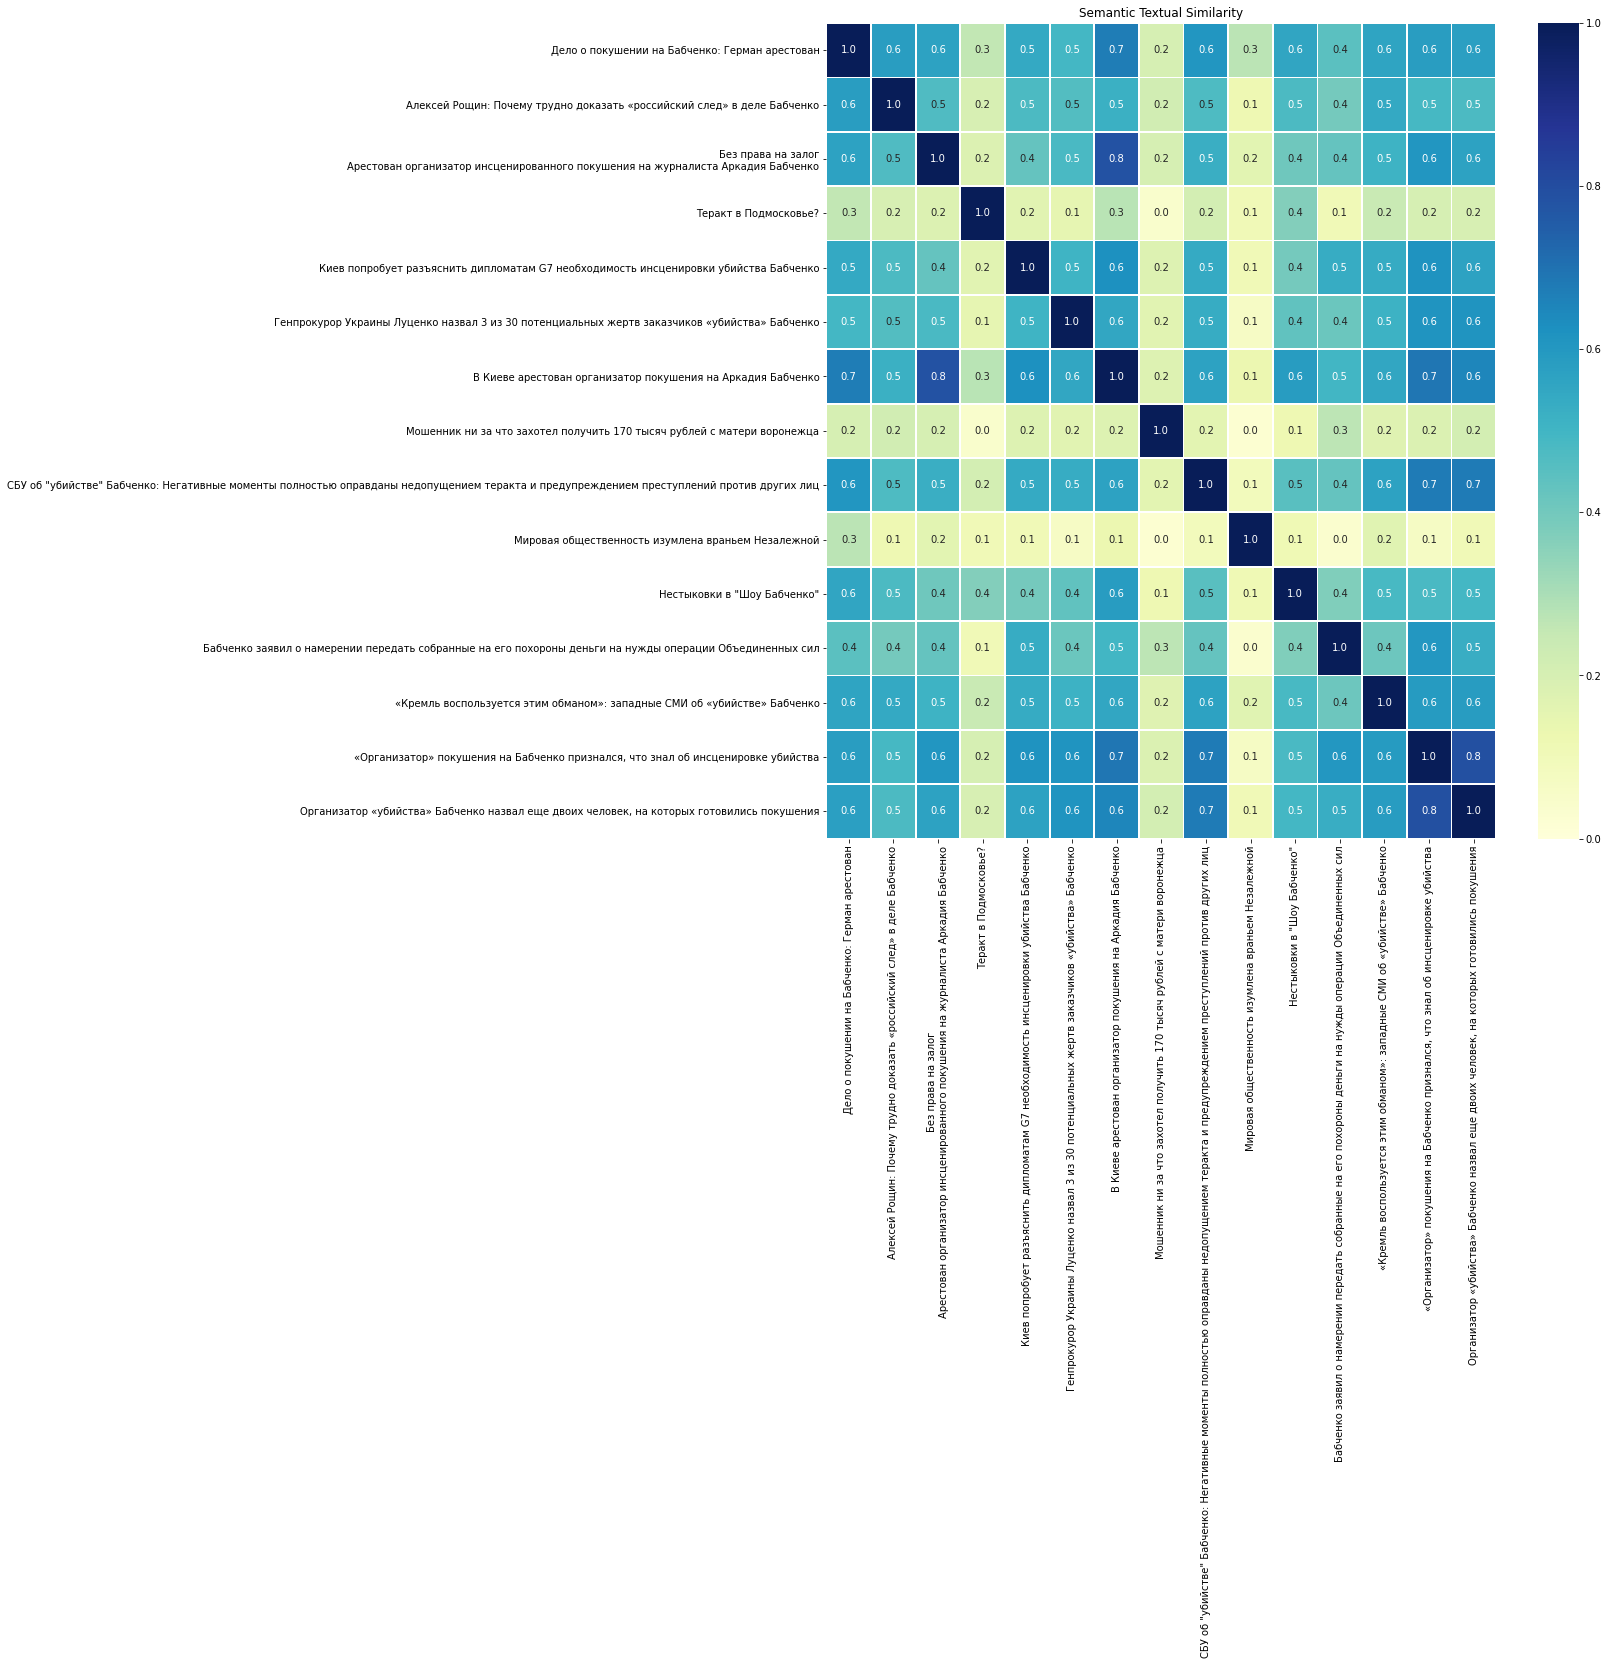

In [ ]:
plot_heatmap(cos_sim,all_titles[:15],0.8)

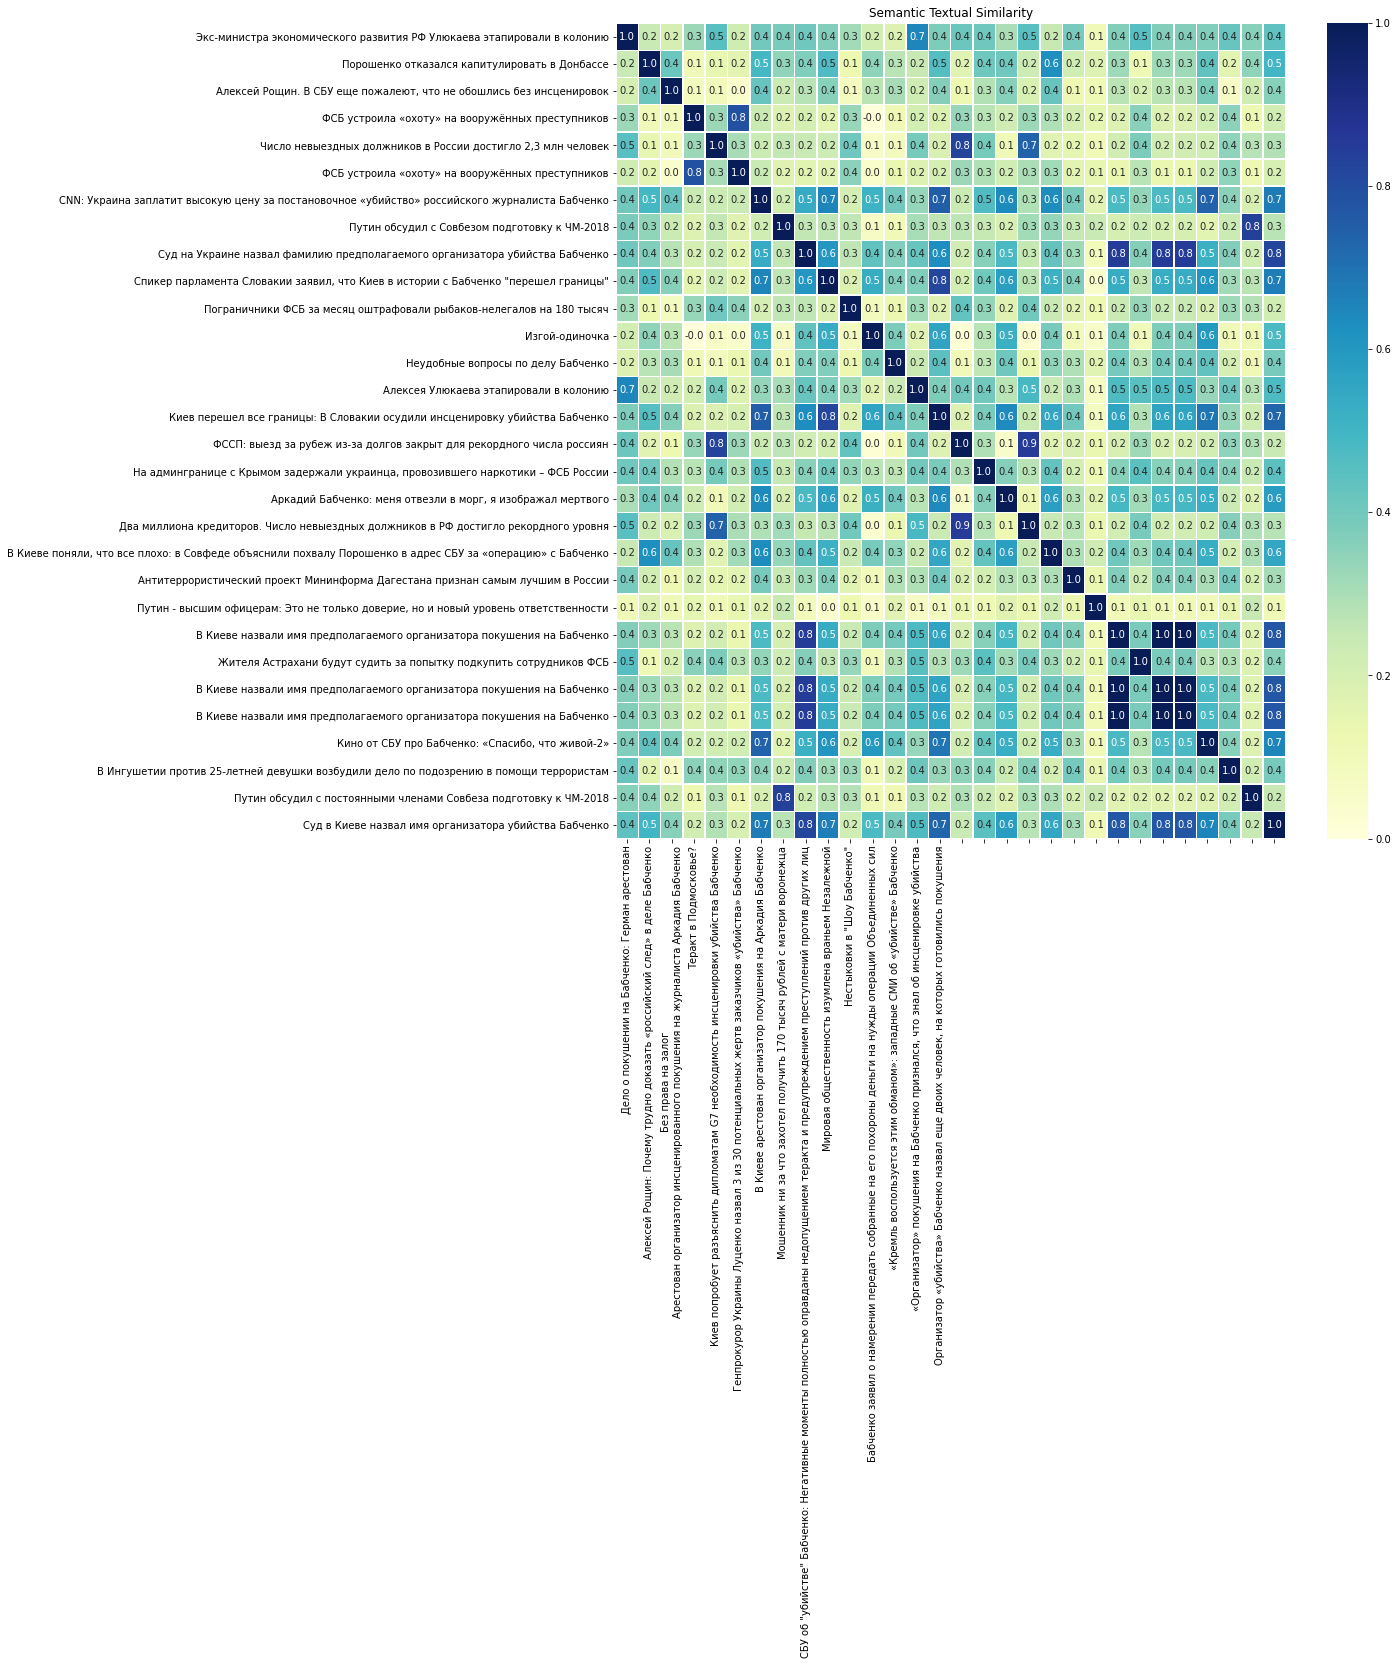

In [ ]:

a = 430
b = 460

message_embeddings_ = model.encode(all_texts[a:b])
labels = all_titles[a:b]
rotation = 90
corr = sklearn.metrics.pairwise.cosine_similarity(message_embeddings_, message_embeddings_)
#corr = np.inner(message_embeddings_, message_embeddings_)
#corr = normalize(corr)
#corr = np.where(corr>a, 1, 0)
plot_heatmap(corr,labels,.5)

## TF-IDF Gensim

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
gen_docs = [[w.lower() for w in word_tokenize(text)] for text in all_titles]
print(gen_docs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[['дело', 'о', 'покушении', 'на', 'бабченко', ':', 'герман', 'арестован'], ['алексей', 'рощин', ':', 'почему', 'трудно', 'доказать', '«', 'российский', 'след', '»', 'в', 'деле', 'бабченко'], ['без', 'права', 'на', 'залог', 'арестован', 'организатор', 'инсценированного', 'покушения', 'на', 'журналиста', 'аркадия', 'бабченко'], ['теракт', 'в', 'подмосковье', '?'], ['киев', 'попробует', 'разъяснить', 'дипломатам', 'g7', 'необходимость', 'инсценировки', 'убийства', 'бабченко'], ['генпрокурор', 'украины', 'луценко', 'назвал', '3', 'из', '30', 'потенциальных', 'жертв', 'заказчиков', '«', 'убийства', '»', 'бабченко'], ['в', 'киеве', 'арестован', 'организатор', 'покушения', 'на', 'аркадия', 'бабченко'], ['мошенник', 'ни', 'за', 'что', 'захотел', 'получить', '170', 'тысяч', 'рублей', 'с', 'матери', 'воронежца'], ['сбу', 'об', '``', 'убийстве', "''", 'бабченко', ':', 'негативные', 'моме

In [ ]:
import numpy as np
import gensim.models, gensim.corpora
from gensim.models import TfidfModel
from gensim.corpora import Dictionary

dictionary = gensim.corpora.Dictionary(gen_docs)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
tf_idf = gensim.models.TfidfModel(corpus)

for doc in corpus[:2]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in tf_idf[doc]])

[[':', 0.16], ['арестован', 0.48], ['бабченко', 0.15], ['герман', 0.58], ['дело', 0.36], ['на', 0.15], ['о', 0.22], ['покушении', 0.44]]
[[':', 0.1], ['бабченко', 0.09], ['«', 0.09], ['»', 0.09], ['алексей', 0.32], ['в', 0.04], ['деле', 0.28], ['доказать', 0.44], ['почему', 0.27], ['российский', 0.26], ['рощин', 0.39], ['след', 0.33], ['трудно', 0.44]]


In [ ]:
sims = gensim.similarities.Similarity(dataset,tf_idf[corpus],
                                        num_features=len(dictionary))

In [ ]:
# Пример поискового движка по близости
line = 'Бабченко арестован'
query_doc = [w.lower() for w in word_tokenize(line)]
query_doc_bow = dictionary.doc2bow(query_doc) 
query_doc_tf_idf = tf_idf[query_doc_bow]

# Средняя близость
sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims/sims[query_doc_tf_idf].size)

# Максимально близкий заголовок
indices = np.where(sims[query_doc_tf_idf] == sims[query_doc_tf_idf].max())
print(sims[query_doc_tf_idf][int(indices[0])])
all_titles[int(indices[0])]

0.0067546666136048305
0.528524


/usr/local/lib/python3.6/dist-packages/gensim/similarities/docsim.py:518: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.hstack(shard_results)


'В Киеве арестован организатор покушения на Аркадия Бабченко'

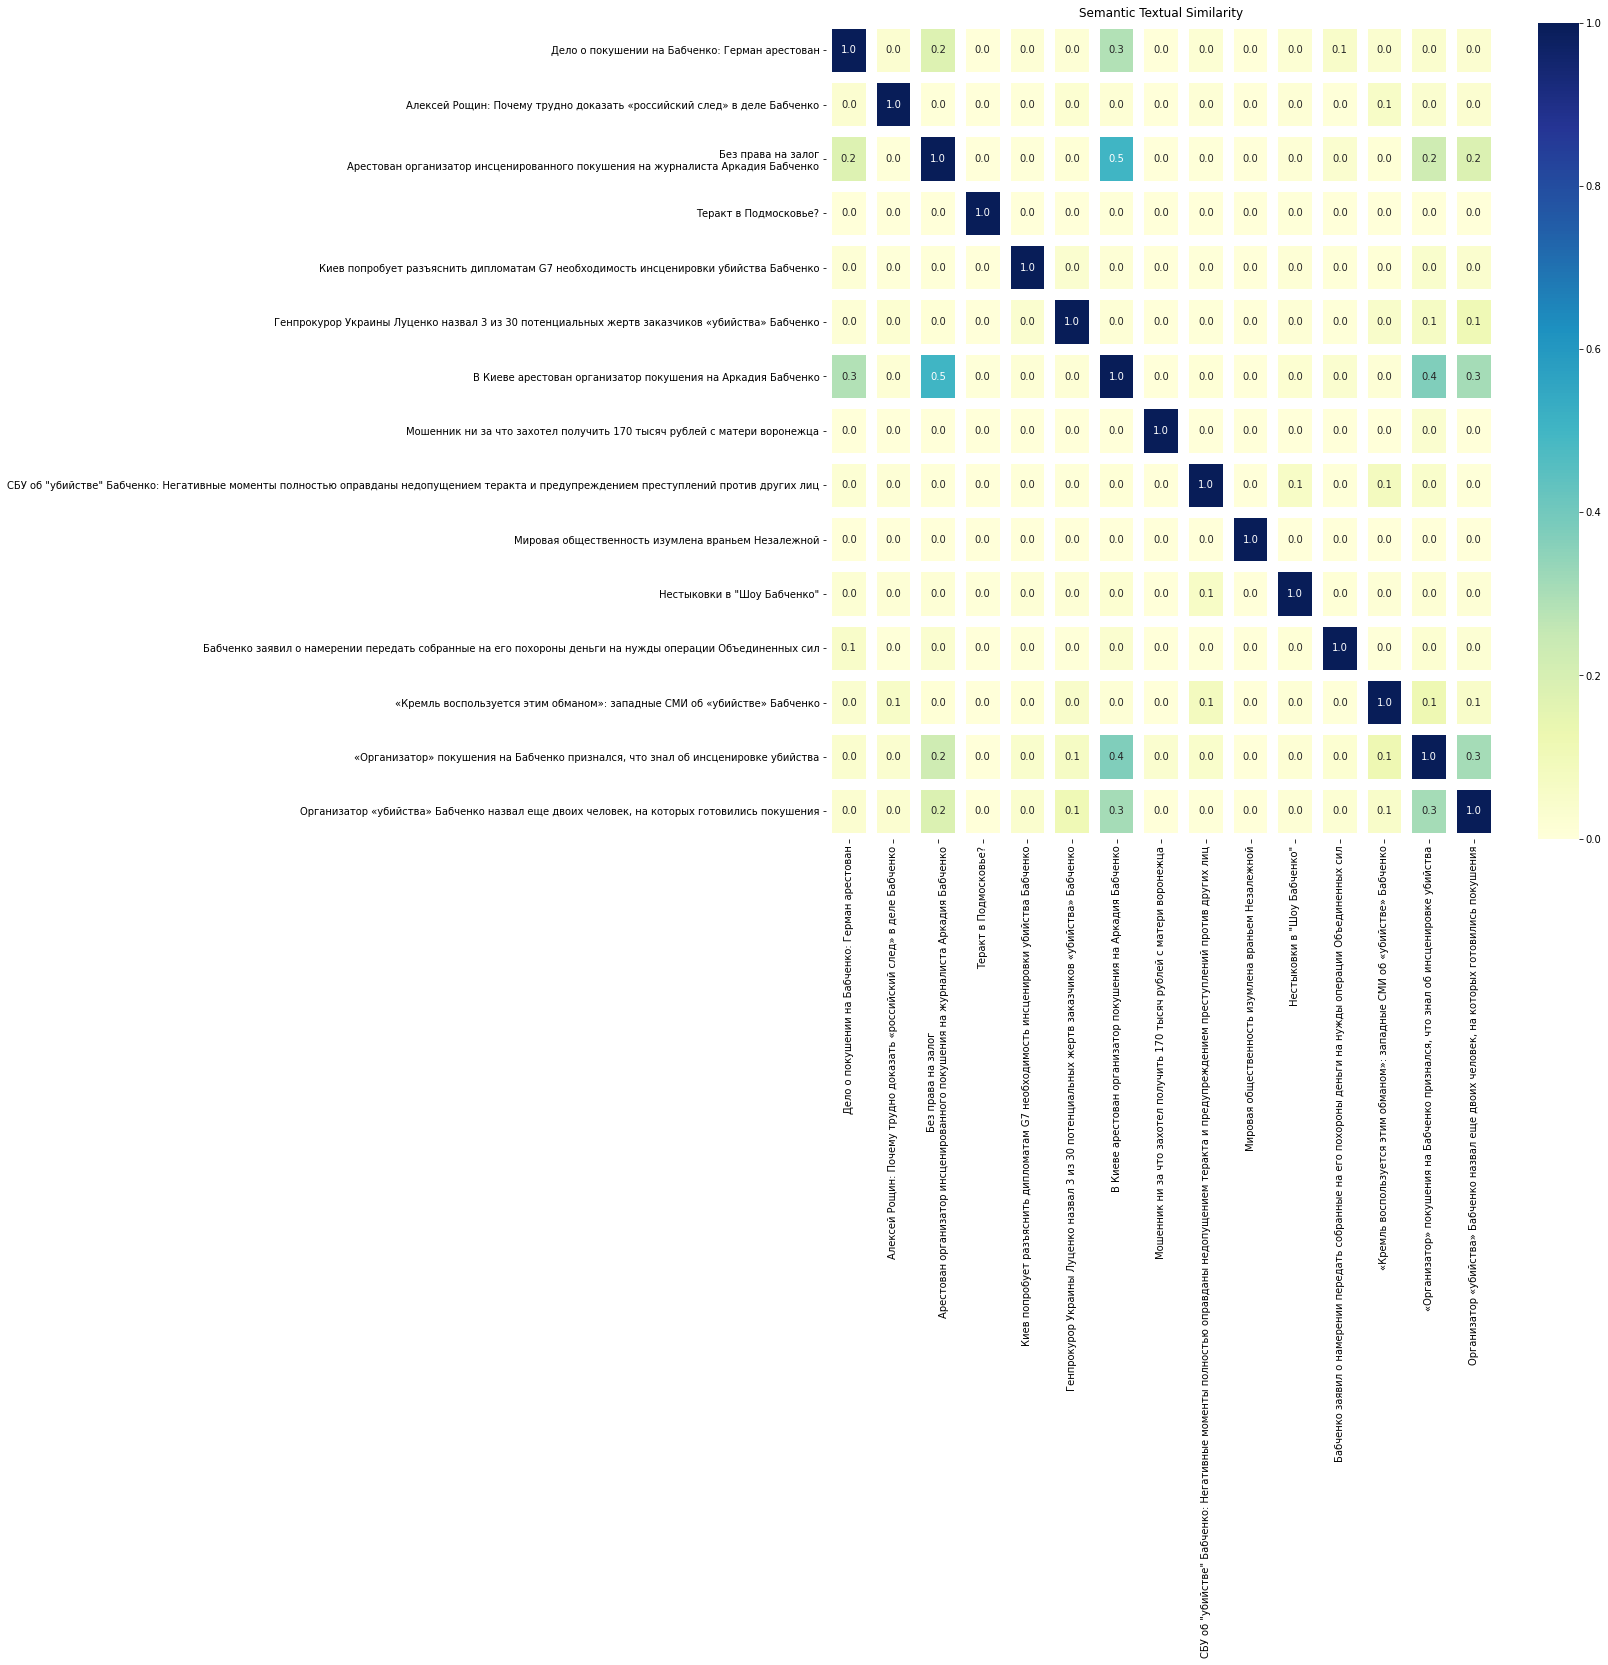

In [ ]:
index = gensim.similarities.MatrixSimilarity(tf_idf[corpus], num_features=len(dictionary))

sim_matrix = []
a = 15
for elem in all_titles[:a]:
    query_doc = [w.lower() for w in word_tokenize(elem)]
    query_doc_bow = dictionary.doc2bow(query_doc) 
    query_doc_tf_idf = tf_idf[query_doc_bow]
    col = index.get_similarities(query_doc_tf_idf)
    sim_matrix.append(col[:a])

plot_heatmap(sim_matrix,all_titles[:a], 10)

## Doc2Vec

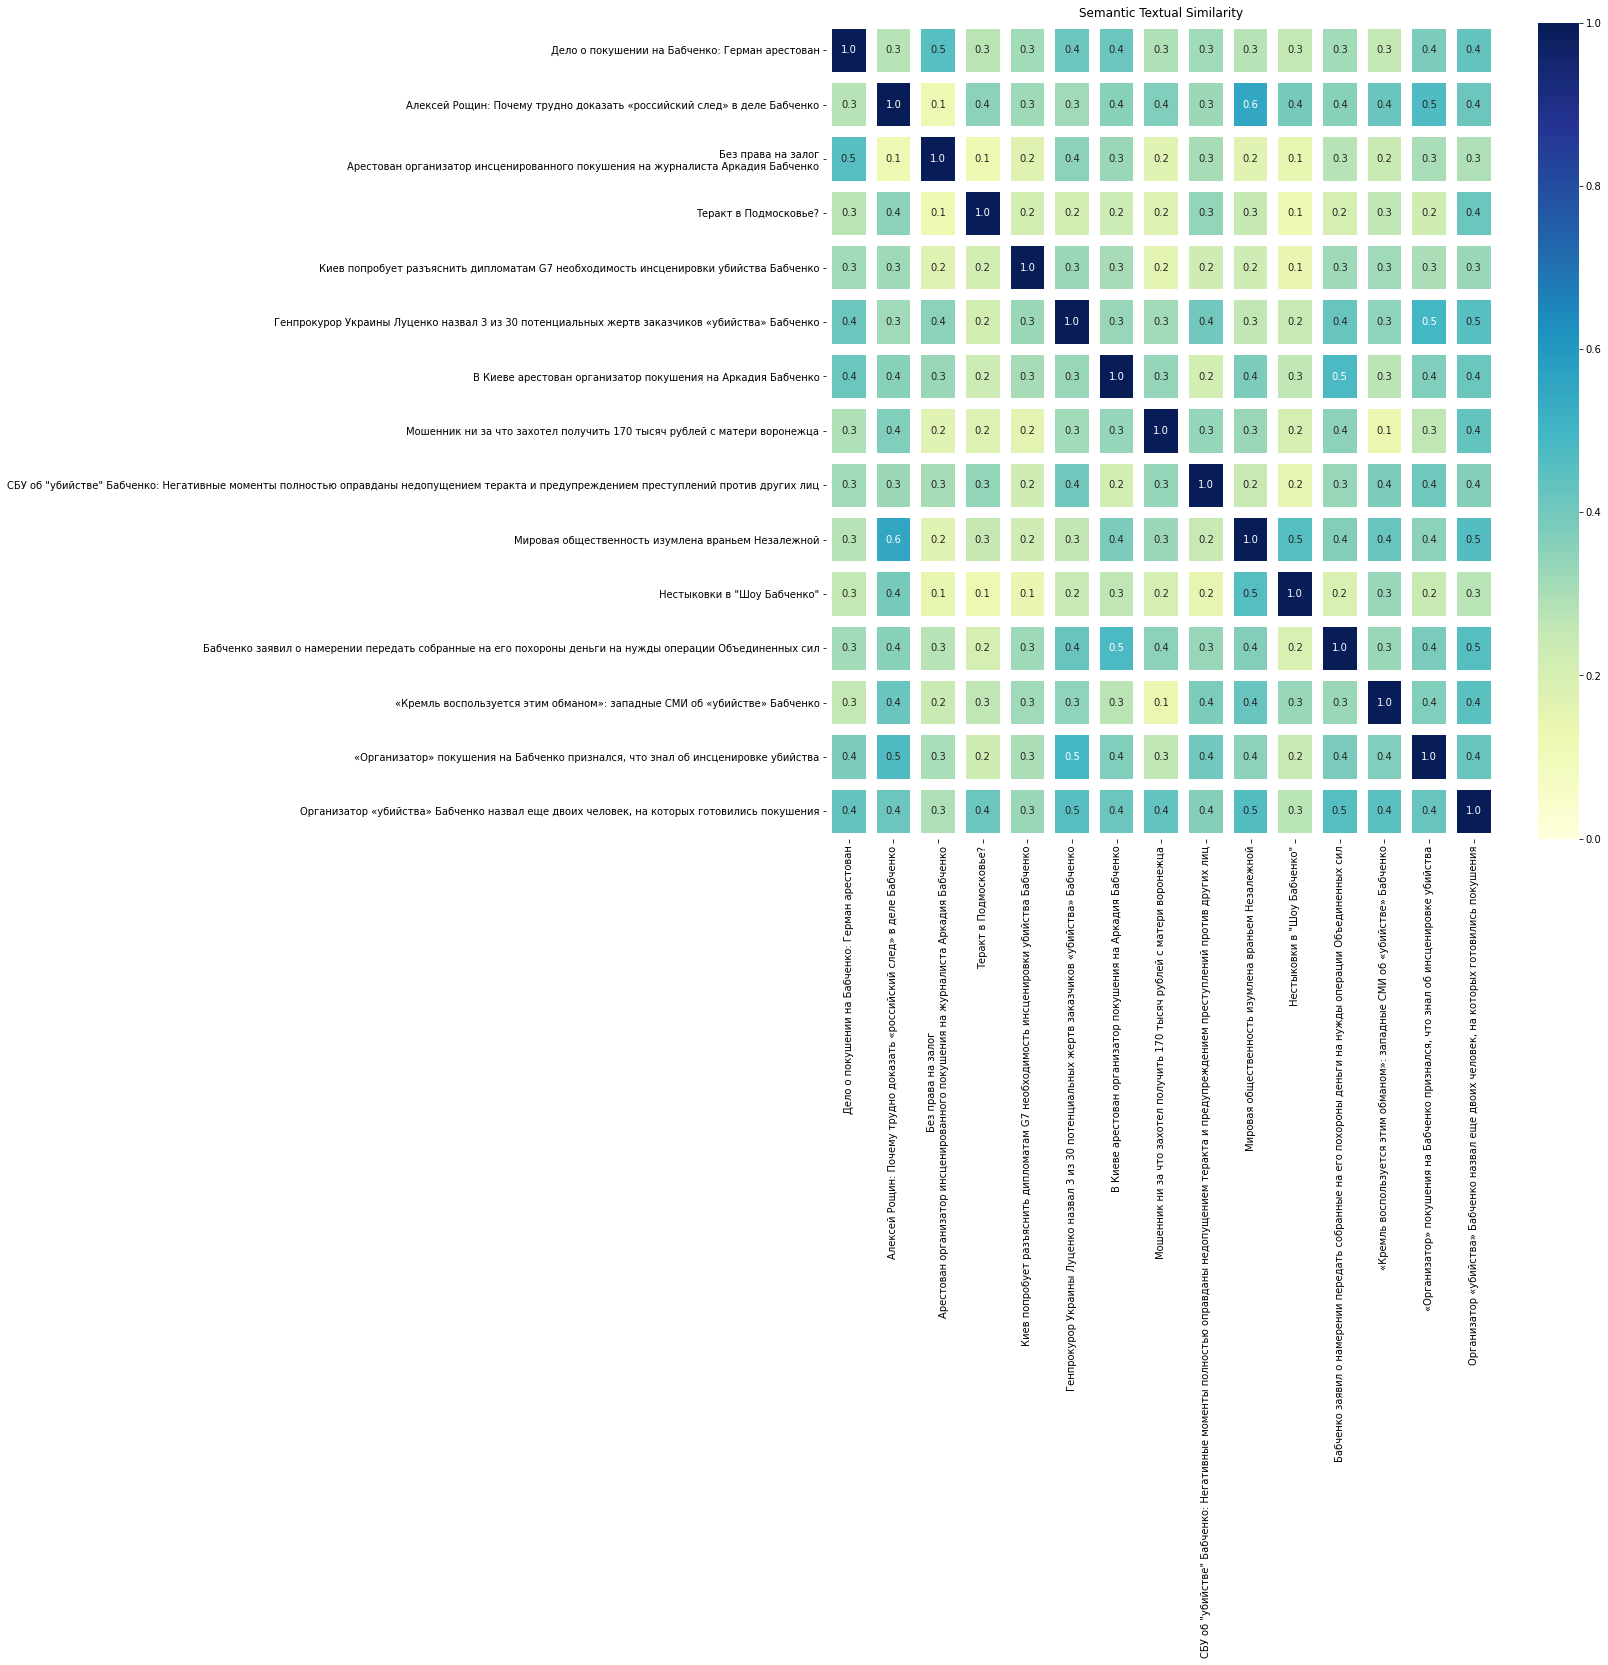

In [ ]:
d2v_emb=[doc2vec_model.infer_vector(gensim.utils.simple_preprocess(i)) for i in all_texts[:15]]

d2v_matrix = sklearn.metrics.pairwise.cosine_similarity(d2v_emb, d2v_emb)
plot_heatmap(d2v_matrix,all_titles[:15], 10)

In [ ]:
# Визуальная оценка качества на тестовом корпусе
doc_id = random.randint(0, len(test_corpus) - 1)
inferred_vector = doc2vec_model.infer_vector(test_corpus[doc_id])
sims = doc2vec_model.docvecs.most_similar([inferred_vector], topn=len(doc2vec_model.docvecs))

print('Test Document ({}): «{}»\n'.format(doc_id, ' '.join(test_corpus[doc_id])))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % doc2vec_model)
for label, index in [('MOST', 0), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]:
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(train_corpus[sims[index][0]].words)))

Test Document (8128): «замглавы фсб рф владимир кулишов заявил что регион возможно проникновение украинских сил»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d150,n5,w5,mc2,s0.001,t3):

MOST (8128, 0.9421177506446838): «замглавы фсб рф владимир кулишов заявил что регион возможно проникновение украинских сил»

MEDIAN (251, 0.583984375): «подконтрольном кремлю раздольненском районном суде мая сторона обвинения закончила предоставлять доказательства по делу украинского активиста владимира балуха который марта объявил бессрочную голодовку сизо симферополя об этом крым реалии сообщил адвокат дмитрий динзе сегодня обвинение закончило предоставлять доказательства был допрошен один свидетель обвинения соответственно отложили заседание на следующую неделю на число сказал динзе на прошлом судебном заседании суд отказал проведении технической экспертизы видеозаписей камер наблюдения ивс которые зафиксировали инцидент между владимиром балухом начальником изолятора валерием ткаченко адвокаты нас

In [ ]:
# Случайный заголовок и второй по близости
import random
doc_id = random.randint(0, 200)

print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(train_corpus[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(train_corpus[sim_id[0]].words)))

Train Document (44): «шевченковский районный суд киева арестовал на суток задержанного бориса германа которого сбу считают организатором планируемого убийства российского журналиста аркадия бабченко таким образом суд удовлетворил ходатайство прокуратуры об избрании герману меры пресечения виде содержания под стражей германа защищает фирма адвоката евгения солодко известного также по делам александра ефремова юрия крысина вечером мая полиция сообщила что киеве убили российского оппозиционного журналиста аркадия бабченко мая председатель сбу василий грицак сообщил что журналист жив грицак утверждает что спецслужбе удалось раскрыть план по подготовке убийства журналиста сбу задержала гражданина украины которого по словам грицака для организации убийства наняли российские спецслужбы журналист оставил свою родину феврале года имел возможность жить праге но выбрал работу ведущим на телеканале atr киеве он объяснял решение уехать из россии информацией возможности открытия уголовного производс

## Word2Vec

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import pandas as pd
import numpy as np
import os

In [ ]:
def simple_average(sent):
    sents_emd = []
    for s in sent:
        sent_emd = []
        for w in s:
            if w in word2vec_model:
                sent_emd.append(word2vec_model[w])
        sent_emd_ar = np.array(sent_emd)
        sum_ = sent_emd_ar.sum(axis=0)
        result = sum_/np.sqrt((sum_**2).sum())
        sents_emd.append(result)
    return sents_emd

dataset='/content/drive/MyDrive/Colab Notebooks/data/train.txt'
with open(dataset,'r',encoding='utf-8') as fin:
    dataset=fin.readlines()
dataset=[t.split(' ') for t in dataset]
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)



# if os.path.exists("word2vec.model"):
#     w2v_model.save("word2vec.model")
# else:
w2v_model.build_vocab(dataset)

w2v_model.train(dataset, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.init_sims(replace=True)

sent='мама мыла раму'


# 2. Кластерный анализ (качество оценить по сюжетам)

Задача:провести кластеризацию, оценить качество на основании текстов, которые были отнесены к определенному кластеру


In [8]:
import matplotlib.pyplot as plt

## Оценка числа кластеров

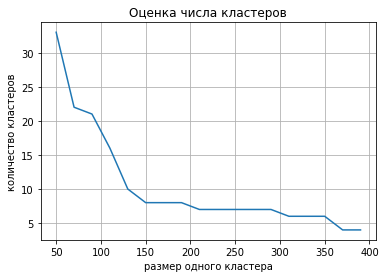

In [9]:
i=0
cl_size=50
sizes,count=[],[]
clusters = df1['Событие'].unique()
while cl_size<400:
  i=0
  for cluster in clusters:
    dfc = df1[df1.Событие == cluster]
    if len(dfc)>cl_size:
      i+=1
  sizes.append(cl_size)
  count.append(i)
  cl_size+=20

fig, ax = plt.subplots()

ax.plot(sizes,count)
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('размер одного кластера')
ax.set_ylabel('количество кластеров')
plt.title('Оценка числа кластеров')
plt.show()

In [18]:
X=model.encode(df1['Текст'].to_list())

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=8).fit(X)
print(clustering.labels_)
df1['Cluster']=clustering.labels_

[3 3 3 ... 1 6 6]


In [ ]:
print(df1[['Событие','Cluster']])

                                                Событие  Cluster
0     Аркадий Бабченко: «Мне сказали: готовься, трав...        3
1     Аркадий Бабченко: «Мне сказали: готовься, трав...        3
2     Аркадий Бабченко: «Мне сказали: готовься, трав...        3
3                                 Теракт в Подмосковье?        1
4     Аркадий Бабченко: «Мне сказали: готовься, трав...        3
...                                                 ...      ...
9556  Михалев собрал Почётных граждан Читы перед Днё...        6
9557  Михалев собрал Почётных граждан Читы перед Днё...        6
9558                  Программа мероприятий на выходные        1
9559  Кровавая помещица: как Салтычиха сидела в зато...        6
9560              Пограничным войскам России – 100 лет!        6

[9561 rows x 2 columns]


In [ ]:
cluster3=df1[df1.Cluster==2]
print(cluster3[['Событие','Cluster']].sort_values(['Событие']).head(50))

                                                Событие  Cluster
4724                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
9543                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
4972                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
4981                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
4734                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
5124                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
7239                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
7171                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
5179                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
4720                   "В ЭТОТ РАЗ РЕШИЛИ ЗАКРЫТЬ ВСЕХ"        2
4370                   "ВЛАСТЬ ОПАСАЕТСЯ ВЛИЯНИЯ ИЗВНЕ"        2
1838  "Росгосстрах жизнь" планирует сменить название...        2
224   "Росгосстрах жизнь" планирует сменить название...        2
1972  "Росгосстрах жизнь" планирует сменить название...        2
1861  "Росгосстрах жизнь"

## 269 кластеров

## Парсер подборки

In [1]:
import glob
import pandas as pd

dataset_dir='/content/drive/MyDrive/Colab Notebooks/data/Подборка3/Texts/'
uiml_texts=glob.glob('/content/drive/MyDrive/Colab Notebooks/data/Подборка3/Texts/**/*.uiml')
print(uiml_texts)

[]


In [ ]:
import xml.etree.ElementTree as ET
import datetime

i=0
df= pd.DataFrame(columns=['title','text','cluster'])
for path in uiml_texts:
  data=path.split('/')
  cluster=data[-2]
  title=data[-1][:-5]
  tree = ET.parse(path)
  root = tree.getroot()
  t=tree.find('Text')
  text=t.attrib.get('Value')
  # date=tree.find('CreateDate')
  # date_cr=date.attrib.get('Value')
  # date_pub=date.attrib.get('ValueUtc')
  # date_cr=datetime.datetime.strptime(date_cr, '%H:%M:%S %d.%m.%Y')
  # print([title,text,cluster,date_cr])
  df.loc[i]=[title,text,cluster]
  i+=1
  print(i)
print(df)

In [ ]:
df.to_excel('/content/drive/MyDrive/Colab Notebooks/data/подборка.xlsx')

In [9]:

xl = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/data/подборка.xlsx')
df = xl.parse(xl.sheet_names[0])
# События - кластеры
clusters = df['cluster'].unique()
df=df.sort_values(['cluster'])
# Все заголовки
all_titles = df['title'].to_list()
all_texts=df['text'].tolist()
print(len(all_texts),all_texts[0])
test=df['cluster'].tolist()
# delta=df['tdelta'].tolist()

725 Москва. 4 октября. INTERFAX.RU - Советник по СМИ секретаря генсовета "Единой России" Александра Хинштейн и внучка первого главы КГБ Ивана Серова Вера подали на радиостанцию "Эхо Москвы" иск за распространение сведений, порочащих честь и достоинство, и потребовали взыскать с нее 2 млн рублей. Соответствующие документы размещены на сайте радиостанции. В иске говорится, что 14 июля в эфире "Эха" вышла программа "Дилетанты", в которой историк Борис Соколов заявляет, что опубликованные в 2016 году мемуары председателя КГБ СССР Ивана Серова являются фальшивкой, сфабрикованной их редактором Александром Хинштейном с целью реабилитации "палача" Серова. С Соколова истцы потребовали по 500 тысяч рублей.


In [ ]:
d=delta[0]-delta[235]
d.total_seconds()//3600

4211.0

## Преобразование в эмбидинги

In [12]:
X=model.encode(all_texts)

## Visuality

In [16]:
!pip install umap-learn
!pip install umap-learn[plot]

     |████████████████████████████████| 15.8MB 345kB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 112kB 56.7MB/s 
     |████████████████████████████████| 686kB 49.3MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=7e3804a56c7ae86f4dac6bd88f409a0e3e271872dced0283fa435c04f79039e5
  Stored in directory: /root/.cache/pip/wheels/8d/06/05/c1cba3d57bdcfd3960e3f60a9fdc97e4baef2ef09af0ad1ef8
Successfully built datashape
ERROR: distributed 2021.4.0 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
ERROR: distributed 2021.4.0 has requirement dask>=2021.03.0, but you'll have dask 2.12.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.25.3


In [17]:
import numpy as np
import umap
import seaborn as sns
import umap.plot

In [7]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(28,20)})

In [13]:
mapper = umap.UMAP().fit(X, y=df.cluster)


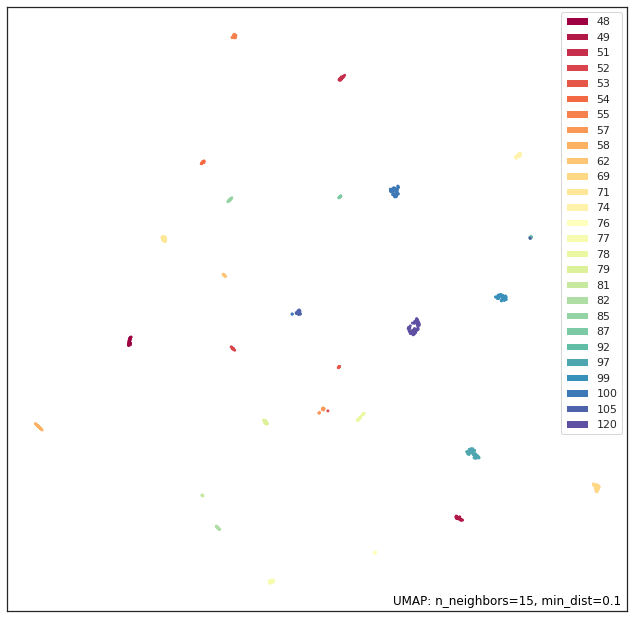

In [20]:
umap.plot.points(mapper, labels=df.cluster)

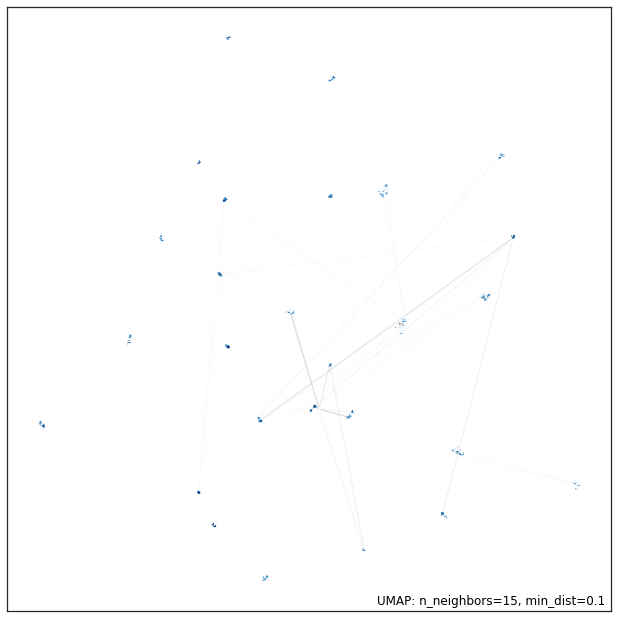

In [22]:
umap.plot.connectivity(mapper, show_points=True)

## Эксперементы с разными алгоритмами кластеризации

In [ ]:
from sklearn.cluster import AgglomerativeClustering


clustering = AgglomerativeClustering(n_clusters=269).fit(X)
print(clustering.labels_)
df['Cluster_res']=clustering.labels_


[184 184 184 ... 243 243 243]


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
print(labels)
df['mean_sift']=ms.labels_
df['mean_sift'].unique()

[0 0 0 ... 0 0 0]


array([0])

In [ ]:
from sklearn.cluster import OPTICS

opt=OPTICS()
# Run the fit
opt.fit(X)
labels = opt.labels_
df['optica']=labels
len(df['optica'].unique())

166

In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN().fit(X)

labels = db.labels_

df['dbscan']=labels
len(df['dbscan'].unique())

46

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0.21,compute_full_tree=True).fit(X)
print(clustering.labels_)
labels=clustering.labels_
df['agl']=labels
len(df['agl'].unique())

In [ ]:
print(df[['cluster','Cluster_res','mean_sift','optica','dbscan']])

      cluster  Cluster_res  mean_sift  optica  dbscan
0           0          184          0       0      -1
1           0          184          0       0      -1
2           0          184          0       0      -1
3           0          184          0       0      -1
4           0          184          0       0      -1
...       ...          ...        ...     ...     ...
1594      268          243          0     122      44
1595      268          243          0     122      44
1596      268          243          0     122      44
1597      268          243          0     122      44
1599      268          243          0     122      -1

[1600 rows x 5 columns]


Confusion matrix, without normalization
[[7 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 8 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]


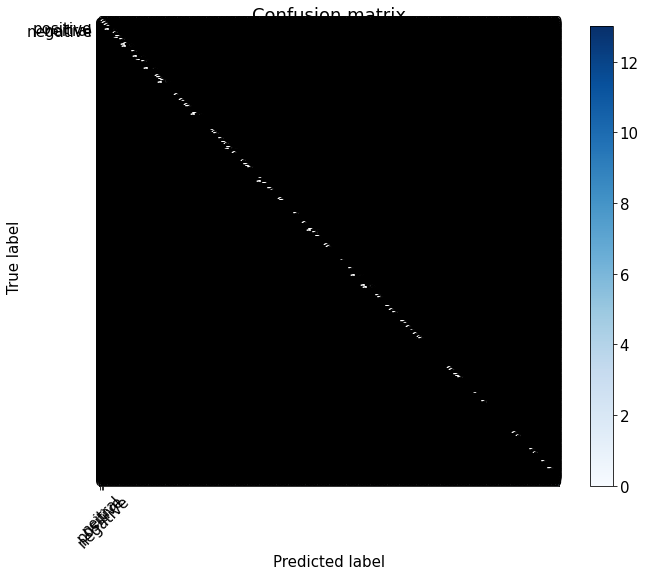

In [ ]:
font = {'size' : 15}

plt.rc('font', **font)
test=df['cluster'].to_list()
y_res=df['Cluster_res'].to_list()
cnf_matrix = confusion_matrix(renamed_labels,y_res)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['positive','neitral', 'negative'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

## Подсчет метрик по оценке качества кластеризации

In [ ]:
res=df.groupby('cluster')['Cluster_res'].agg(lambda g: g.value_counts().index[0]).to_dict()
renamed_labels = [res[x] for x in test]
print(renamed_labels)
print(result.tolist())

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 57, 57, 57, 57, 57, 57, 57, 57

In [ ]:
from sklearn.metrics import f1_score
f1_score(renamed_labels,y_res, average='macro')

In [ ]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(renamed_labels,y_res)

0.9688526482659824

In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster._supervised import check_clusterings

def pair_confusion_matrix(labels_true, labels_pred):
    """Pair confusion matrix arising from two clusterings.
    The pair confusion matrix :math:`C` computes a 2 by 2 similarity matrix
    between two clusterings by considering all pairs of samples and counting
    pairs that are assigned into the same or into different clusters under
    the true and predicted clusterings.
    Considering a pair of samples that is clustered together a positive pair,
    then as in binary classification the count of true negatives is
    :math:`C_{00}`, false negatives is :math:`C_{10}`, true positives is
    :math:`C_{11}` and false positives is :math:`C_{01}`.
    Read more in the :ref:`User Guide <pair_confusion_matrix>`.
    Parameters
    ----------
    labels_true : array-like of shape (n_samples,), dtype=integral
        Ground truth class labels to be used as a reference.
    labels_pred : array-like of shape (n_samples,), dtype=integral
        Cluster labels to evaluate.
    Returns
    -------
    C : ndarray of shape (2, 2), dtype=np.int64
        The contingency matrix.
    See Also
    --------
    rand_score: Rand Score
    adjusted_rand_score: Adjusted Rand Score
    adjusted_mutual_info_score: Adjusted Mutual Information
    Examples
    --------
    Perfectly matching labelings have all non-zero entries on the
    diagonal regardless of actual label values:
      >>> from sklearn.metrics.cluster import pair_confusion_matrix
      >>> pair_confusion_matrix([0, 0, 1, 1], [1, 1, 0, 0])
      array([[8, 0],
             [0, 4]]...
    Labelings that assign all classes members to the same clusters
    are complete but may be not always pure, hence penalized, and
    have some off-diagonal non-zero entries:
      >>> pair_confusion_matrix([0, 0, 1, 2], [0, 0, 1, 1])
      array([[8, 2],
             [0, 2]]...
    Note that the matrix is not symmetric.
    References
    ----------
    .. L. Hubert and P. Arabie, Comparing Partitions, Journal of
      Classification 1985
      https://link.springer.com/article/10.1007%2FBF01908075
    """
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = np.int64(labels_true.shape[0])

    # Computation using the contingency data
    contingency = contingency_matrix(
        labels_true, labels_pred, sparse=True)
    n_c = np.ravel(contingency.sum(axis=1))
    n_k = np.ravel(contingency.sum(axis=0))
    sum_squares = (contingency.data ** 2).sum()
    C = np.empty((2, 2), dtype=np.int64)
    C[1, 1] = sum_squares - n_samples
    C[0, 1] = contingency.dot(n_k).sum() - sum_squares
    C[1, 0] = contingency.transpose().dot(n_c).sum() - sum_squares
    C[0, 0] = n_samples ** 2 - C[0, 1] - C[1, 0] - sum_squares
    return C



In [ ]:
matrix=pair_confusion_matrix(test,labels)
print(matrix)
precision=matrix[0][0]/(matrix[0][0]+matrix[0][1])
recall=matrix[0][0]/(matrix[0][0]+matrix[1][0])
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

## Кастомный к-ближайших соседей

In [ ]:
def f1(etalon, predict):
    l = np.unique(etalon).max()
    k = np.unique(predict).max()
    T = np.zeros((k, l + 1), dtype=float)
    R, P, F = (0.0, 0.0, 0.0)
    for i, j in zip(predict, etalon):
        T[(i - 1, j)] += 1

    n_kj = T.sum(axis=0)
    n_il = T.sum(axis=1)
    n = T.sum()
    for i in range(k):
        Rij_max, Pij_max = (0.0, 0.0)
        for j in range(l + 1):
            Rij = T[(i, j)] / n_il[i]
            Pij = T[(i, j)] / n_kj[j]
            if Rij > Rij_max:
                Rij_max = Rij
            if Pij > Pij_max:
                Pij_max = Pij

        R += n_il[i] * Rij_max / n
        P += n_il[i] * Pij_max / n
        F += 2 * n_il[i] * Pij_max * Rij_max / ((Rij_max + Pij_max) * n)

    return (float(F), float(R), float(P), pd.DataFrame((T.astype(int)), columns=(n_kj.astype(int)), index=(n_il.astype(int))))

In [ ]:
f1_res=f1(renamed_labels,y_res)
print(f1_res[0],f1_res[1],f1_res[2])

In [ ]:
from scipy.spatial import distance

class CustomKNeighbour(object):
  def __init__(self,X=None, time_delta=None, percent=0.4, neighbor_k=6, percent_match=0.9, threshold=0.36):
    self.X=X
    self.time_delta=time_delta
    self.percent=percent
    self.neighbor_k=neighbor_k
    self.percent_match=percent_match
    self.threshold=threshold
    self.idx = np.zeros((X.shape[0]), dtype=int)

  def get_cluster(self,X=None):
          """
          Parameters
          percent: Процент соседей от общего числа объектов выборки
          neighbor_k: Количество соседей после порога

          return: вектор кластеров?
          """
          params = (self.percent, self.neighbor_k, self.percent_match)
          d = dict()
          count = 0
          for i in range(X.shape[0]):
              print(str(1.0 * i / X.shape[0]) + '\x07' + 'Clustering')
              cluster_num = self.get_cluster_num(d, i, params)
              if cluster_num is not None:
                  d[cluster_num] = d[cluster_num] + [i]
              else:
                  count += 1
                  d[count] = [i]

          idx = np.zeros((X.shape[0]), dtype=int)
          for k, v in d.items():
              for doc_id in v:
                  idx[doc_id] = k

          return idx.tolist()

  def get_cluster_num(self,d, i, params):
    percent, neighbor_k, percent_match = params
    
    # X = sparseMatrix #здесь имеется в виду матрица эмбеддингов
    
    for cluster_num, docs_ids in d.items():
      for doc_id in docs_ids:
        if self.is_dublucate(self.X[doc_id], self.X[i], percent_match):
          return cluster_num
        if self.decision(self.X[doc_id], self.X[i], self.time_delta[doc_id], self.time_delta[i]):
          if self.insert_to_cluster(d[cluster_num], i, percent, neighbor_k):
            return cluster_num

            
  def insert_to_cluster(self,cluster, doc_id, percent, neighbor_k):
    """
    Parameters
    percent: Процент соседей от общего числа объектов выборки
    neighbor_k: Количество соседей после порога
    """
    rift = int(neighbor_k / percent) + 1
    # X = sparseMatrix
    if len(cluster) <= rift:
      neighbor_k = int(percent * len(cluster))
      neighbor_k = neighbor_k if neighbor_k > 0 else 1
    neighbor = 1
    for i in cluster:
      if doc_id == i:
        pass
      else:
        if neighbor == neighbor_k:
          return True
        if self.decision(self.X[doc_id], self.X[i],self.time_delta[doc_id],self.time_delta[i]):
          neighbor += 1

    return False
    
  def is_dublucate(self,x, y, perсent_match):
      if np.array_equal(x,y):
        return True
      else:
        return False

  def decision(self,x,y,tx,ty):
    corr = distance.cosine(x, y)
    if corr<self.threshold and self.timedelta(tx,ty)<96:
      return True
    else:
      return False

  def timedelta(self,time1,time2):
    hours=(time1-time2).total_seconds()//3600
    if hours < 0:
      hours=hours * (-1)
    return hours

In [ ]:
knn_model=CustomKNeighbour(X,delta,threshold=0.33,neighbor_k=5)
result=knn_model.get_cluster(X)
print(result)

In [ ]:
df['Cluster_res']=result
r=result.tolist()
fks=f1_score(r,renamed_labels,average='micro')
print(fks)
print(len(renamed_labels))


0.6055172413793104
725


Критерии
Пара новостей относятся к одному событию, когда у них совпадают

1. Время события (и близко время написания)
2. Числа: такие как курс акций компании или число жертв
3. Места: например, место проведения мероприятия или место ДТП

Пара новостей НЕ относятся к одному событию, когда в них:

1. Несовпадающие факты: время или место события, значимо отличающие числа жертв, и т.д.
2. Содержится описание события в одной из новостей и комментарий этого события некоторой личностью в другой.

# 3. Классификация по тональности с помощью нейронок

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df1['Тональность'])
df1['Тональность']=le.transform(df1['Тональность'])
pos=df1[df1['Тональность']==0].head(60)
neg=df1[df1['Тональность']==1].head(60)
nei=df1[df1['Тональность']==2].head(60)
data=pos['Текст'].to_list() +neg['Текст'].to_list() +nei['Текст'].to_list()
labels_fit=pos['Тональность'].to_list()+neg['Тональность'].to_list()+nei['Тональность'].to_list()

Строим эбмидинги с помощью SentenceBERT

In [18]:
embedings=model.encode(data)

In [ ]:
embedings=[doc2vec_model.infer_vector(gensim.utils.simple_preprocess(i)) for i in data]

In [19]:
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression

classif=SGDClassifier()

classif.fit(embedings,labels_fit)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 111   16   25]
 [2779 2426 2577]
 [ 156   70 1401]]


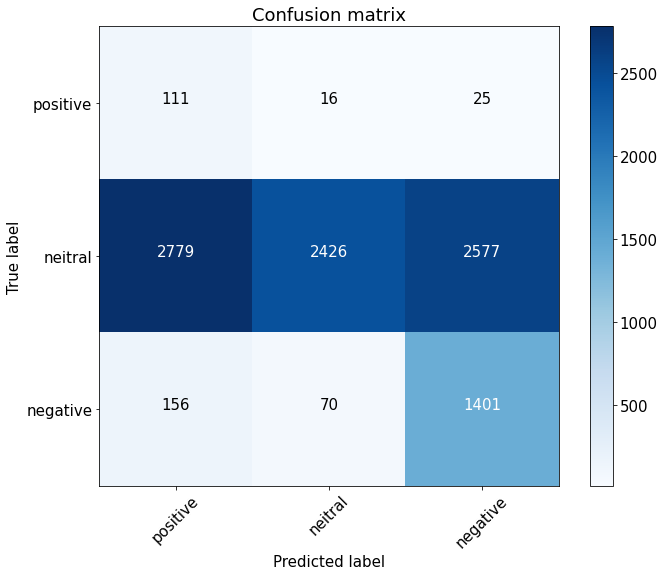

In [22]:

font = {'size' : 15}

plt.rc('font', **font)
test_embed=model.encode(df1['Текст'].to_list())
# test_embed=[doc2vec_model.infer_vector(gensim.utils.simple_preprocess(i)) for i in df1['Текст'].head(200).to_list()]
test=classif.predict(test_embed)
y_res=df1['Тональность'].to_list()
cnf_matrix = confusion_matrix(y_res, test)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['positive','neitral', 'negative'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

# 4. Оценка соответствия заголовка тексту (это как маркер фейк ньюс)

In [ ]:
from scipy.spatial import distance
fake_labels=[]
threshold=0.7
for title,text in zip(all_titles,all_texts):
  emb_title,emb_text=model.encode(title),model.encode(text)
  corr = distance.cosine(emb_title, emb_text)
  fake_labels.append(corr)
  # if corr>threshold:
  #   fake_labels.append('Not Fake')
  # else:
  #   fake_labels.append('Fake')
df1['Fake']=fake_labels 

In [ ]:
print(df1.head(50))

                                            Заголовок  ...      Fake
0      Дело о покушении на Бабченко: Герман арестован  ...      Fake
1   Алексей Рощин: Почему трудно доказать «российс...  ...      Fake
2   Без права на залог\nАрестован организатор инсц...  ...      Fake
3                               Теракт в Подмосковье?  ...  Not Fake
4   Киев попробует разъяснить дипломатам G7 необхо...  ...      Fake
5   Генпрокурор Украины Луценко назвал 3 из 30 пот...  ...      Fake
6   В Киеве арестован организатор покушения на Арк...  ...      Fake
7   Мошенник ни за что захотел получить 170 тысяч ...  ...  Not Fake
8   СБУ об "убийстве" Бабченко: Негативные моменты...  ...      Fake
9   Мировая общественность изумлена враньем Незале...  ...  Not Fake
10                        Нестыковки в "Шоу Бабченко"  ...      Fake
11  Бабченко заявил о намерении передать собранные...  ...      Fake
12  «Кремль воспользуется этим обманом»: западные ...  ...      Fake
13  «Организатор» покушения на Баб

In [ ]:
df1.to_excel("/content/drive/MyDrive/Colab Notebooks/data/output.xlsx")  

# Dialog | Telegram Contest

Описание
В данном задании Вам предстоит определить, относится ли пара новостей к одному сюжету.

Сюжетом мы называем набор новостей об одном и том же событии. При этом понятие "события" максимально узкое: это что-то, что случилось в определённое время, с определёнными людьми и определённым образом. Но об этом событии пишут разные источники, и именно такие описания мы хотим объединять в сюжет.

Чтобы ознакомиться со всем сюжетом, как правило, достаточно одной статьи из него. Чтобы ознакомиться с темой целиком, как правило, необходимо изучить несколько сюжетов.

Простой критерий того, что новости относятся к одному событию: можно заменить заголовок одной новости на заголовок другой (и наоборот), и Вы не должны заметить разницу. То есть заголовок первой новости хорошо подходит к тексту второй, и наоборот.

## Requirements

In [ ]:
!git clone https://github.com/IlyaGusev/purano

Cloning into 'purano'...
remote: Enumerating objects: 290, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 1026 (delta 147), reused 201 (delta 81), pack-reused 736
Receiving objects: 100% (1026/1026), 1.25 MiB | 9.55 MiB/s, done.
Resolving deltas: 100% (557/557), done.


In [ ]:
%cd purano

/content/purano


In [ ]:
!pip install -r requirements.txt
!pip install catboost
!pip install tensorflow-text tensorflow-hub

     |████████████████████████████████| 20.1MB 1.3MB/s 
     |████████████████████████████████| 972kB 53.0MB/s 
     |████████████████████████████████| 215kB 59.8MB/s 
     |████████████████████████████████| 839kB 54.3MB/s 
     |████████████████████████████████| 122kB 72.9MB/s 
     |████████████████████████████████| 1.3MB 73.7MB/s 
     |████████████████████████████████| 266kB 68.0MB/s 
     |████████████████████████████████| 2.6MB 44.8MB/s 
     |████████████████████████████████| 71kB 10.0MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 163kB 73.8MB/s 
     |████████████████████████████████| 112kB 71.1MB/s 
     |████████████████████████████████| 184kB 76.4MB/s 
     |████████████████████████████████| 276kB 73.5MB/s 
     |████████████████████████████████| 2.9MB 64.6MB/s 

     |████████████████████████████████| 67.3MB 55kB/s 
     |████████████████████████████████| 3.4MB 6.5MB/s 


In [ ]:
!mkdir models/lang_detect
!mkdir models/cat_detect
!wget https://www.dropbox.com/s/hoapmnvqlknmu6v/lang_detect_v10.ftz -O models/lang_detect/lang_detect_v10.ftz
!wget https://www.dropbox.com/s/23x35wuet280eh6/ru_cat_v5.ftz -O models/cat_detect/ru_cat_v5.ftz

--2021-04-11 18:50:49--  https://www.dropbox.com/s/hoapmnvqlknmu6v/lang_detect_v10.ftz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hoapmnvqlknmu6v/lang_detect_v10.ftz [following]
--2021-04-11 18:50:49--  https://www.dropbox.com/s/raw/hoapmnvqlknmu6v/lang_detect_v10.ftz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5e79bd6262fa24c41ebaa16585.dl.dropboxusercontent.com/cd/0/inline/BMakTbthXSUbtbyr_KYg-S_gKI2_d_R0da7Jae1wpY38uTnCSKBVSSc-fKWgwiPhnREn9amxzx4fZfwF-UmkrJS0SauRulV0x21hsV7vacRzFVmf4fd46y6ee_0ig4dVAsx6qKjkUvXHn9HMXvbtYYqE/file# [following]
--2021-04-11 18:50:50--  https://uc5e79bd6262fa24c41ebaa16585.dl.dropboxusercontent.com/cd/0/inline/BMakTbthXSUbtbyr_KYg-S_gKI2_d_R0da7Jae1wpY38uTnCSKBVSSc-fKWgwiPhnREn9

## Data loading

In [ ]:
# May 25 (training)
!rm -rf data
!mkdir -p data
!cd data && wget https://data-static.usercontent.dev/DataClusteringDataset0525.tar.gz -O - | tar -xz && cd ../
# May 27 and 29 (test)
!cd data && wget https://data-static.usercontent.dev/DataClusteringDataset0527.tar.gz -O - | tar -xz && cd ../
!cd data && wget https://data-static.usercontent.dev/DataClusteringDataset0529.tar.gz -O - | tar -xz && cd ../

--2021-04-11 18:50:54--  https://data-static.usercontent.dev/DataClusteringDataset0525.tar.gz
Resolving data-static.usercontent.dev (data-static.usercontent.dev)... 178.128.255.27
Connecting to data-static.usercontent.dev (data-static.usercontent.dev)|178.128.255.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145541247 (139M) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[===================>] 138.80M  20.4MB/s    in 7.7s    

2021-04-11 18:51:02 (18.1 MB/s) - written to stdout [145541247/145541247]

--2021-04-11 18:51:02--  https://data-static.usercontent.dev/DataClusteringDataset0527.tar.gz
Resolving data-static.usercontent.dev (data-static.usercontent.dev)... 178.128.255.27
Connecting to data-static.usercontent.dev (data-static.usercontent.dev)|178.128.255.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166313405 (159M) [application/octet-stream]
Saving to: ‘STDOUT’

-                   100%[=======

In [ ]:
%%writefile configs/cleaner.jsonnet
{
    "lang_detect_model_path": "models/lang_detect/lang_detect_v10.ftz",
    "cat_detect_model_path": "models/cat_detect/ru_cat_v5.ftz",
    "is_lower": true,
    "is_russian_only": true,
    "is_news_only": true
}

Overwriting configs/cleaner.jsonnet


In [ ]:
!rm -f 0525_parsed.db
!python3 -m purano.run_parse --inputs "data/20200525" --output-file 0525_parsed.db --fmt html --cleaner-config configs/cleaner.jsonnet
!rm -f 0527_parsed.db
!python3 -m purano.run_parse --inputs "data/20200527" --output-file 0527_parsed.db --fmt html --cleaner-config configs/cleaner.jsonnet
!rm -f 0529_parsed.db
!python3 -m purano.run_parse --inputs "data/20200529" --output-file 0529_parsed.db --fmt html --cleaner-config configs/cleaner.jsonnet

Parsed 10000 documents
Parsed 20000 documents
Parsed 30000 documents
Parsed 40000 documents
Parsed 50000 documents
Parsed 60000 documents
Parsed 70000 documents
Parsed 80000 documents
19380 will be saved
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19380 entries, 3219 to 17991
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype                    
---  ------         --------------  -----                    
 0   url            19380 non-null  object                   
 1   host           19380 non-null  object                   
 2   title          19380 non-null  object                   
 3   text           19380 non-null  object                   
 4   date           19380 non-null  datetime64[ns, tzlocal()]
 5   patched_title  19380 non-null  object                   
 6   patched_text   19380 non-null  object                   
 7   category       19380 non-null  object                   
dtypes: datetime64[ns, tzlocal()](1), object(7)
memory usage: 1.3

In [ ]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import pandas as pd
from purano.models import Document

def parse_db(file_name):
    db_engine = "sqlite:///{}".format(file_name)
    engine = create_engine(db_engine)
    Session = sessionmaker(bind=engine)
    session = Session()
    query = session.query(Document)
    docs = query.all()
    records = []
    i=0
    df = pd.DataFrame(columns=['title','text','url','host','timestamp','category','patched_title','patched_text'])
    for doc in docs:
        records.append({
            "title": doc.title,
            "text": doc.text,
            "url": doc.url,
            "host": doc.host,
            "timestamp": doc.date,
            "category": doc.category,
            "patched_title": doc.patched_title,
            "patched_text": doc.patched_text
        })
        df.loc[i]=[doc.title,doc.text,doc.url,doc.host, doc.date,doc.category, doc.patched_title, doc.patched_text]
        i+=1
    return df,records

train_records = parse_db("0525_parsed.db")
test_0527_records = parse_db("0527_parsed.db")
test_0529_records = parse_db("0529_parsed.db")
print(len(train_records))
print(len(test_0527_records))
print(len(test_0529_records))
print(train_records[0])

2
2
2
                                                   title  ...                                       patched_text
0      На Элке планируется организовать комфортную зо...  ...  объявлен аукцион на аренду земельного участка ...
1      Невнимательность брестчанки на перекрестке сто...  ...  4-летний пассажир был госпитализирован в детск...
2       Нардепам вновь разрешили командировки по Украине  ...  глава верховной рады дмитрий разумков разрешил...
3      Минздрав Грузии разрешил возобновить экономиче...  ...  эпидситуация в грузии позволяет бизнесу постеп...
4      За 30 лет украинцев стало меньше на 10 миллион...  ...  количество наличного населения украины по сост...
...                                                  ...  ...                                                ...
19375  Узбекистан потратил на лечение больных COVID-1...  ...  узбекистан потратил на лечение и реабилитацию ...
19376  Имущество «Тепловых сетей» Новочеркасска выста...  ...  имущество муп « тепловые се

In [ ]:
# Fasttext model tuned on older documents
!wget https://www.dropbox.com/s/vttjivmmxw7leea/ru_vectors_v3.bin
# Clustering training markup
!wget https://www.dropbox.com/s/8lu6dw8zcrn840j/ru_clustering_0525_urls.tsv
# Clustering test set
!wget https://www.dropbox.com/s/v2lbfft6pgzoeq3/ru_clustering_test_fixed.tsv
# Headline selection training set
!wget https://www.dropbox.com/s/jpcwryaeszqtrf9/titles_markup_0525_urls.tsv
# Headline selection test set
!wget https://www.dropbox.com/s/v3c0q6msy2pwvfm/titles_markup_test.tsv

--2021-04-11 19:02:15--  https://www.dropbox.com/s/vttjivmmxw7leea/ru_vectors_v3.bin
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/vttjivmmxw7leea/ru_vectors_v3.bin [following]
--2021-04-11 19:02:15--  https://www.dropbox.com/s/raw/vttjivmmxw7leea/ru_vectors_v3.bin
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3e28e0f06dd2b6d9a041243a72.dl.dropboxusercontent.com/cd/0/inline/BMaIzi6Ml6EtauPjZ8C9IIPip6L59ZTsw408lfjyrEvHSxnvnAstQ4eRrlcmDdp1FXgEuOo3yt9rYgqH8o0fkn2A6ymAOn6MT3aq4Ib7U6FPq9Jw9lf4eQTx2WZzmrwMMnjFzcSMIEv8HnaV9qvg9NvT/file# [following]
--2021-04-11 19:02:16--  https://uc3e28e0f06dd2b6d9a041243a72.dl.dropboxusercontent.com/cd/0/inline/BMaIzi6Ml6EtauPjZ8C9IIPip6L59ZTsw408lfjyrEvHSxnvnAstQ4eRrlcmDdp1FXgEuOo3yt9

## Fetching texts for pretraining

Optional section, required for TF-IDF and Text-Title models

Full list of archives: https://github.com/IlyaGusev/purano/blob/master/raw_datasets.txt

In [ ]:
%%writefile raw_datasets.txt
https://data-static.usercontent.dev/DataClusteringSample0410.tar.gz
https://data-static.usercontent.dev/DataClusteringSample1117.tar.gz

Overwriting raw_datasets.txt


In [ ]:
%%writefile download_datasets.sh
#!/bin/bash

# Download datasets
rm -rf raw_datasets
mkdir raw_datasets
cd raw_datasets
wget -i ../raw_datasets.txt
for F in *.tar.gz; do
    tar -xzf "$F"
    rm -f "$F"
done
cd ../

Writing download_datasets.sh


In [ ]:
!bash download_datasets.sh

--2021-03-12 22:18:59--  https://data-static.usercontent.dev/DataClusteringSample0410.tar.gz
Resolving data-static.usercontent.dev (data-static.usercontent.dev)... 178.128.255.27
Connecting to data-static.usercontent.dev (data-static.usercontent.dev)|178.128.255.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918103137 (876M) [application/octet-stream]
Saving to: ‘DataClusteringSample0410.tar.gz’

DataClusteringSampl 100%[===================>] 875.57M  29.7MB/s    in 32s     

2021-03-12 22:19:32 (27.0 MB/s) - ‘DataClusteringSample0410.tar.gz’ saved [918103137/918103137]

--2021-03-12 22:19:32--  https://data-static.usercontent.dev/DataClusteringSample1117.tar.gz
Reusing existing connection to data-static.usercontent.dev:443.
HTTP request sent, awaiting response... 200 OK
Length: 910299179 (868M) [application/octet-stream]
Saving to: ‘DataClusteringSample1117.tar.gz’

DataClusteringSampl 100%[===================>] 868.13M  27.2MB/s    in 32s     

2021-03-1

In [ ]:
from purano.io import read_tg_html_dir
from tqdm.notebook import tqdm

from purano.run_parse import DocumentsCleaner

cleaner = DocumentsCleaner("configs/cleaner.jsonnet")

raw_texts = []
pretrain_records = []
for i, record in tqdm(enumerate(read_tg_html_dir("raw_datasets"))):
    cleaned_document = cleaner(record)
    if not cleaned_document:
        continue
    raw_texts.append(cleaned_document["title"])
    raw_texts.append(cleaned_document["text"])
    pretrain_records.append(cleaned_document)

Parsed 10000 documents
Parsed 20000 documents
Parsed 30000 documents
Parsed 40000 documents
Parsed 50000 documents
Parsed 60000 documents
Parsed 70000 documents
Parsed 80000 documents
Parsed 90000 documents
Parsed 100000 documents
Parsed 110000 documents
Parsed 120000 documents
Parsed 130000 documents
Parsed 140000 documents
Parsed 150000 documents
Parsed 160000 documents
Parsed 170000 documents
Parsed 180000 documents
Parsed 190000 documents
Parsed 200000 documents
Parsed 210000 documents
Parsed 220000 documents
Parsed 230000 documents
Parsed 240000 documents
Parsed 250000 documents
Parsed 260000 documents
Parsed 270000 documents
Parsed 280000 documents
Parsed 290000 documents
Parsed 300000 documents
Parsed 310000 documents
Parsed 320000 documents
Parsed 330000 documents
Parsed 340000 documents
Parsed 350000 documents
Parsed 360000 documents
Parsed 370000 documents
Parsed 380000 documents
Parsed 390000 documents
Parsed 400000 documents
Parsed 410000 documents
Parsed 420000 documents
P

In [ ]:
print(len(pretrain_records))

229601


## Clustering

### Evaluation

In [ ]:
from purano.io import read_markup_tsv

train_markup = read_markup_tsv("ru_clustering_0525_urls.tsv")
test_markup = read_markup_tsv("ru_clustering_test_fixed.tsv")

In [ ]:
from collections import Counter
from statistics import median, mean
from sklearn.cluster import AgglomerativeClustering
from purano.clusterer.metrics import calc_metrics

def get_quality(markup, embeds, records, dist_threshold, print_result=False):
    clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=dist_threshold,
        linkage="average",
        affinity="cosine"
    )

    clustering_model.fit(embeds)
    labels = clustering_model.labels_
    print(len(list(set(labels))))
    idx2url = dict()
    url2record = dict()
    for i, record in enumerate(records):
        idx2url[i] = record["url"]
        url2record[record["url"]] = record

    url2label = dict()
    for i, label in enumerate(labels):
        url2label[idx2url[i]] = label
        
    metrics = calc_metrics(markup, url2record, url2label)[0]
    if print_result:
        print()
        print("Accuracy: {:.1f}".format(metrics["accuracy"] * 100.0))
        print("Positives Recall: {:.1f}".format(metrics["1"]["recall"] * 100.0))
        print("Positives Precision: {:.1f}".format(metrics["1"]["precision"] * 100.0))
        print("Positives F1: {:.1f}".format(metrics["1"]["f1-score"] * 100.0))
        print("Distance: ", dist_threshold)
        sizes = list(Counter(labels).values())
        print("Max cluster size: ", max(sizes))
        print("Median cluster size: ", median(sizes))
        print("Avg cluster size: {:.2f}".format(mean(sizes)))
        return
    return metrics["1"]["f1-score"]

In [ ]:
import copy

def form_submission(markup, embeds, records, dist_threshold, dataset_name):
    clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=dist_threshold,
        linkage="average",
        affinity="cosine"
    )

    clustering_model.fit(embeds)
    labels = clustering_model.labels_
    idx2url = dict()
    url2record = dict()
    for i, record in enumerate(records):
        idx2url[i] = record["url"]
        url2record[record["url"]] = record
    url2label = dict()
    for i, label in enumerate(labels):
        url2label[idx2url[i]] = label
    submission = []
    for record in markup:
        dataset = record["dataset"]
        if dataset != dataset_name:
            continue
        first_url = record["first_url"]
        second_url = record["second_url"]
        r = copy.copy(record)
        r["quality"] = "OK" if url2label[first_url] == url2label[second_url] else "BAD"
        submission.append(r)
    return submission

### FastText model

In [ ]:
import fasttext
import numpy as np
from tqdm import tqdm

def ft_embed_text(text, ft_model, max_tokens_count=150):
    vector_dim = ft_model.get_dimension()
    tokens = text.split(" ")[:max_tokens_count]
    word_embeddings = np.zeros((len(tokens), vector_dim), dtype=np.float32)
    for token_num, token in enumerate(tokens):
        word_embeddings[token_num, :] = ft_model.get_word_vector(token)
    mean_embedding = np.mean(word_embeddings, axis=0)
    max_embeddings = np.max(word_embeddings, axis=0)
    return np.concatenate((mean_embedding, max_embeddings), axis=0)

def ft_records_to_embeds(records, ft_model):
    ft_embeddings = np.zeros((len(records), ft_model.get_dimension() * 4), dtype=np.float32)
    for i, record in enumerate(tqdm(records)):
        embedding_title=ft_embed_text(record["patched_title"], ft_model)
        embedding_text=ft_embed_text(record["patched_text"], ft_model)
        
        ft_embeddings[i, :] = np.concatenate((embedding_title, embedding_text))
    return ft_embeddings

ft_model = fasttext.load_model("ru_vectors_v3.bin")

In [ ]:
train_ft_embeddings = ft_records_to_embeds(train_records[1], ft_model)
test_0527_ft_embeddings = ft_records_to_embeds(test_0527_records[1], ft_model)
test_0529_ft_embeddings = ft_records_to_embeds(test_0529_records[1], ft_model)

100%|██████████| 19096/19096 [00:27<00:00, 706.82it/s]


In [ ]:
get_quality(train_markup, train_ft_embeddings, train_records, 0.041, print_result=True)

14517


TypeError: ignored

In [ ]:
from purano.io import write_markup_tsv
submission_0527_ft = form_submission(test_markup, test_0527_ft_embeddings, test_0527_records, 0.041, "0527")
submission_0529_ft = form_submission(test_markup, test_0529_ft_embeddings, test_0529_records, 0.041, "0529")
full_submission_ft = submission_0527_ft + submission_0529_ft
write_markup_tsv(full_submission_ft, "answer.txt", res_key="quality")
!rm -f submission_ft.zip
!zip submission_ft.zip answer.txt

In [ ]:
!head answer.txt

### USE model

In [ ]:
!pip install tensorflow-text tensorflow-hub

In [ ]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/3"
use_model = hub.load(module_url)
print("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder-multilingual/3 loaded


In [ ]:
import numpy as np
import tqdm.notebook as tq


def use_get_embedding(text, model):
    return model([text]).numpy()[0]

def use_records_to_embeds(records, model):
    embeddings = np.zeros((len(records), 1024))
    for i, record in tq.tqdm(enumerate(records)):
        embedding_title=use_get_embedding(record["title"], model)
        embedding_text=use_get_embedding(record["text"], model)
        embeddings[i] = np.concatenate((embedding_title, embedding_text))
    return embeddings


train_use_embeddings = use_records_to_embeds(train_records[1], use_model)
test_0527_use_embeddings = use_records_to_embeds(test_0527_records[1], use_model)
test_0529_use_embeddings = use_records_to_embeds(test_0529_records[1], use_model)

In [ ]:
get_quality(train_markup, train_use_embeddings, train_records[1], 0.37, print_result=True)

In [ ]:
from purano.io import write_markup_tsv
submission_0527_use = form_submission(test_markup, test_0527_use_embeddings, test_0527_records, 0.37, "0527")
submission_0529_use = form_submission(test_markup, test_0529_use_embeddings, test_0529_records, 0.37, "0529")
full_submission_use = submission_0527_use + submission_0529_use
write_markup_tsv(full_submission_use, "answer.txt", res_key="quality")
!rm -f submission_use.zip
!zip submission_use.zip answer.txt

### TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from purano.util import tokenize_to_lemmas

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_to_lemmas, max_df=0.3, min_df=5)
old_embeddings = tfidf_vectorizer.fit_transform(raw_texts[-150000:])
svd = TruncatedSVD(n_components=500, n_iter=20, random_state=42)
svd.fit(old_embeddings)

TruncatedSVD(algorithm='randomized', n_components=500, n_iter=20,
             random_state=42, tol=0.0)

In [ ]:
import numpy as np

def tfidf_records_to_embeds(records, vectorizer, svd):
    embeddings = vectorizer.transform([r["title"] + " " + r["text"] for r in records])
    embeddings = svd.transform(embeddings)
    embeddings[np.logical_and(np.max(embeddings, axis=1) == 0, np.sum(embeddings, axis=1) == 0)] = np.random.rand(embeddings.shape[1])
    return embeddings

train_tfidf_embeddings = tfidf_records_to_embeds(train_records[1], tfidf_vectorizer, svd)
test_0527_tfidf_embeddings = tfidf_records_to_embeds(test_0527_records[1], tfidf_vectorizer, svd)
test_0529_tfidf_embeddings = tfidf_records_to_embeds(test_0529_records[1], tfidf_vectorizer, svd)

In [ ]:
get_quality(train_markup, train_tfidf_embeddings, train_records, 0.5, print_result=True)

In [ ]:
from purano.io import write_markup_tsv
submission_0527_tfidf = form_submission(test_markup, test_0527_tfidf_embeddings, test_0527_records, 0.5, "0527")
submission_0529_tfidf = form_submission(test_markup, test_0529_tfidf_embeddings, test_0529_records, 0.5, "0529")
full_submission_tfidf = submission_0527_tfidf + submission_0529_tfidf
write_markup_tsv(full_submission_tfidf, "answer.txt", res_key="quality")
!rm -f submission_tfidf.zip
!zip submission_tfidf.zip answer.txt

### Sentence BERT model

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 81kB 4.4MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.0.4-cp37-none-any.whl size=114307 sha256=c99aacfe49144a8499843fb3bc6a7ce8f4a155ea3ddc70f1af01aa06a6a3709a
  Stored in directory: /root/.cache/pip/wheels/26/ea/89/d0d2e013d951b6d23270aa9ca4018b82632ab7cd933c331316
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np
import itertools
import random

model_sb = SentenceTransformer('distiluse-base-multilingual-cased')

In [ ]:
def get_bert_embeddings(records,model):
    embedding_title=model.encode(records['title'].tolist())
    embedding_text=model.encode(records['text'].tolist())
    embeddings = np.concatenate((embedding_title, embedding_text),axis=1)
    return embeddings

In [ ]:
train_sb_embeddings=get_bert_embeddings(train_records[0], model_sb)
test_0527_sb_embeddings=get_bert_embeddings(test_0527_records[0], model_sb)
test_0529_sb_embeddings=get_bert_embeddings(test_0529_records[0], model_sb)

##### Visuality

In [ ]:
!pip install umap-learn
!pip install umap-learn[plot]

     |████████████████████████████████| 81kB 4.3MB/s 
     |████████████████████████████████| 1.2MB 7.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=6c3a043d8b8ac807ea43855e9a315c62cd81256c22ecdfaf010de76326980f3a
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=a99a729b0209d3e6ddacb04e17e08c13fc4ffad57fd8302b88fc57ef4131d1d9
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
     |████████████████████████████████| 15.8MB 354kB/s 
     |████████████████████████████████| 81kB 13.1MB/s 
     |████████████████████████████████| 686kB 59.5MB/s 
  Created wheel for datashape: filename=datashape-0.5.2-cp37-none-any.whl size=59430 sha256=a2c7be2488143cc5fefe11e8b0a76aae0e1b14b7f3fdde03fedc6bd6

In [ ]:
import numpy as np
import umap
import seaborn as sns
import umap.plot

In [ ]:
clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0.48,
        linkage="average",
        affinity="cosine"
    )

clustering_model.fit(train_sb_embeddings)
labels = clustering_model.labels_

In [ ]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(28,20)})

In [ ]:
mapper = umap.UMAP().fit(train_sb_embeddings, y=labels)


In [ ]:
umap.plot.points(mapper, labels=labels)

ValueError: ignored

<Figure size 800x800 with 1 Axes>

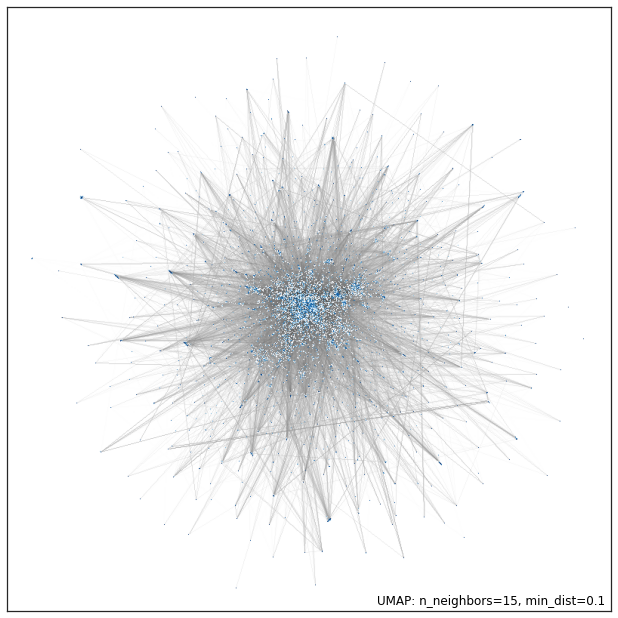

In [ ]:
umap.plot.connectivity(mapper, show_points=True)

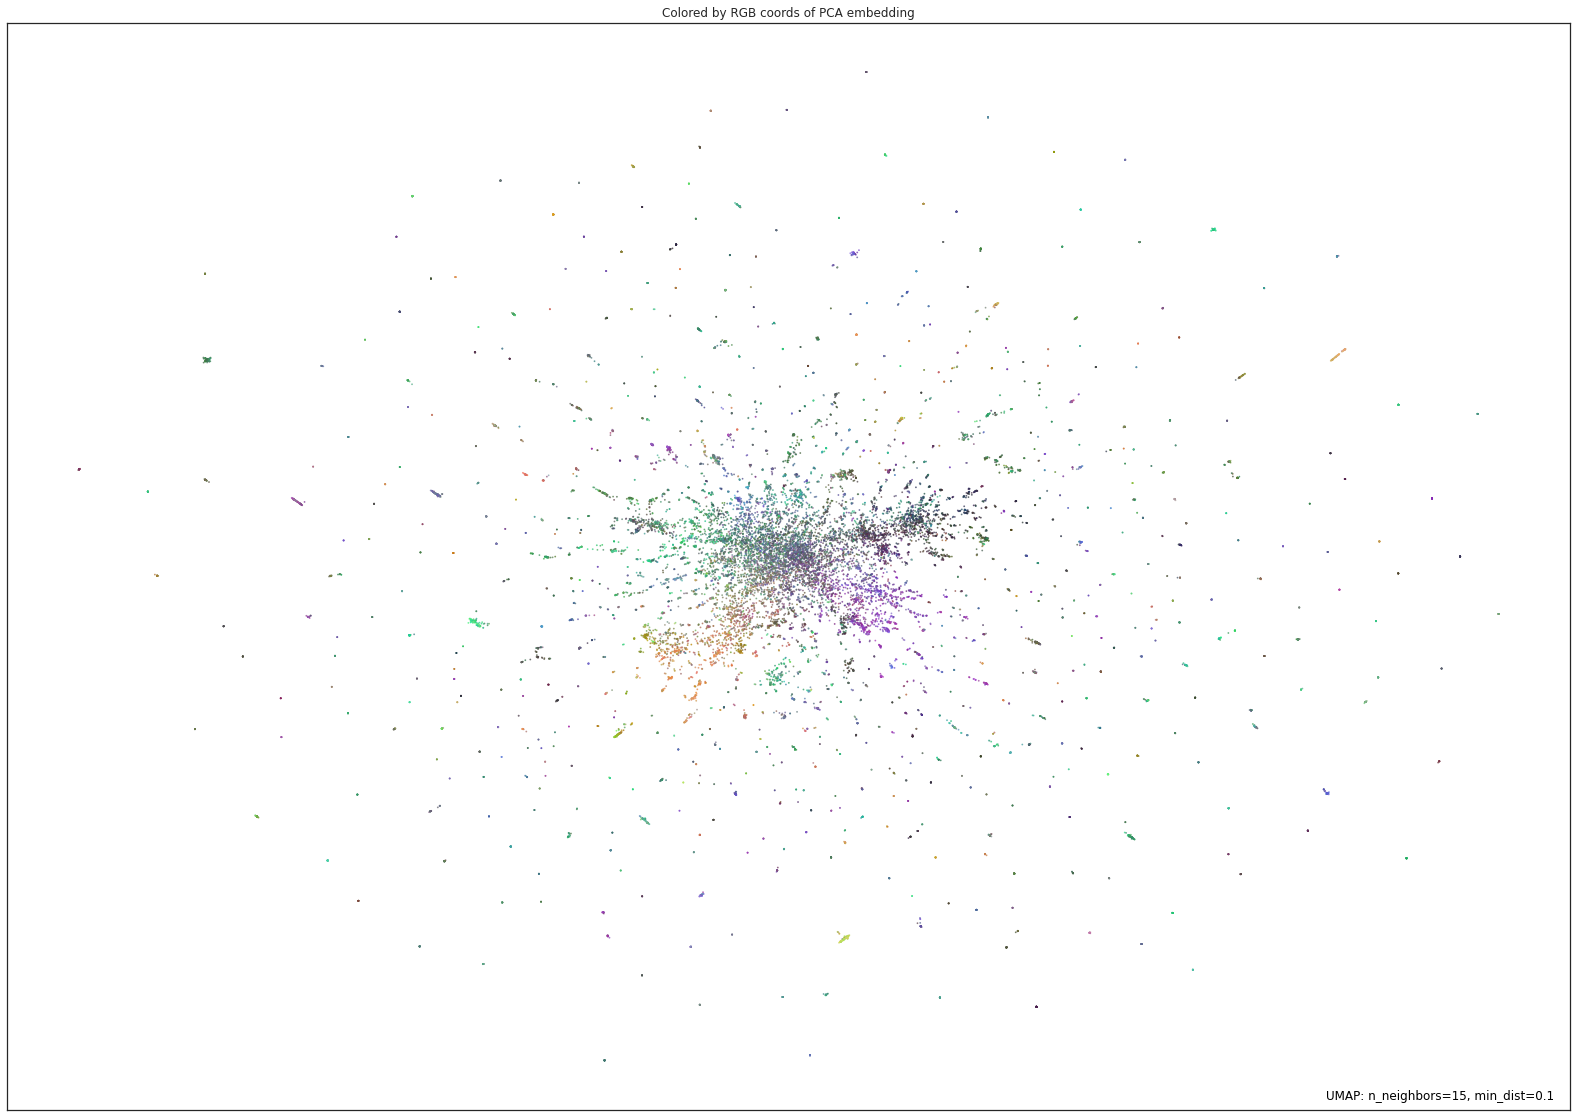

In [ ]:
umap.plot.diagnostic(mapper, diagnostic_type='pca')

### RuSentenceBERT model

In [ ]:
!pip install deeppavlov
!pip install transformers

     |████████████████████████████████| 993kB 13.4MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 512kB 49.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 20.1MB 336kB/s 
     |████████████████████████████████| 6.7MB 51.0MB/s 
     |████████████████████████████████| 1.5MB 37.5MB/s 
     |████████████████████████████████| 10.4MB 175kB/s 
     |████████████████████████████████| 2.1MB 50.1MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 655kB 52.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 860kB 50.7MB/s 
     |████████████████████████████████| 7.3MB 26.2MB/s 
     |████████████████████████████████| 3.2MB 53.7MB/s 
     

In [ ]:
!wget http://files.deeppavlov.ai/deeppavlov_data/bert/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz


--2021-03-18 18:13:24--  http://files.deeppavlov.ai/deeppavlov_data/bert/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz
Resolving files.deeppavlov.ai (files.deeppavlov.ai)... 93.175.29.74
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|93.175.29.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.deeppavlov.ai/deeppavlov_data/bert/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz [following]
--2021-03-18 18:13:24--  https://files.deeppavlov.ai/deeppavlov_data/bert/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz
Connecting to files.deeppavlov.ai (files.deeppavlov.ai)|93.175.29.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 661614603 (631M) [application/octet-stream]
Saving to: ‘sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz.1’

sentence_ru_cased_L 100%[===================>] 630.96M  14.6MB/s    in 51s     

2021-03-18 18:14:15 (12.4 MB/s) - ‘sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz.1’ saved [661614603/661614

In [ ]:
!ls

0525_parsed.db	      NOTICE
0527_parsed.db	      output
0529_parsed.db	      parsers
build_competition.sh  purano
competition	      raw_datasets.txt
compile_proto.sh      README.md
configs		      requirements.txt
data		      ru_clustering_0525_urls.tsv
download_models.sh    ru_clustering_test.tsv
download_raw_data.sh  ru_vectors_v3.bin
dvc.lock	      sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz
dvc.yaml	      sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz.1
html		      titles_markup_0525_urls.tsv
LICENSE		      titles_markup_test.tsv
models		      visualisations.ipynb


In [ ]:
!tar xvzf /content/purano/sentence_ru_cased_L-12_H-768_A-12_pt.tar.gz

sentence_ru_cased_L-12_H-768_A-12_pt/
sentence_ru_cased_L-12_H-768_A-12_pt/pytorch_model.bin
sentence_ru_cased_L-12_H-768_A-12_pt/bert_config.json
sentence_ru_cased_L-12_H-768_A-12_pt/vocab.txt


In [ ]:
from transformers import BertModel, BertConfig,BertTokenizer

# Initializing a BERT bert-base-uncased style configuration
configuration = BertConfig()

 # Initializing a model from the bert-base-uncased style configuration
model_rus = BertModel.from_pretrained('/content/purano/sentence_ru_cased_L-12_H-768_A-12_pt')
tokenizer_rus = BertTokenizer.from_pretrained('/content/purano/sentence_ru_cased_L-12_H-768_A-12_pt')
# Accessing the model configuration
configuration = model_rus.config

In [ ]:
import numpy as np
import tqdm.notebook as tq

# ,padding=True,truncation=True,max_length=512
def get_rusbert_embeddings(records,model,tokenizer):
  embed_titles=np.zeros((len(records['patched_title'].tolist()),768))
  embed_texts=np.zeros((len(records['patched_text'].tolist()),768))
  for i,title in tq.tqdm(enumerate(records['patched_title'].tolist())):
    encoded_input_title = tokenizer(title, return_tensors='pt',max_length=512)
    embedding_title = model(**encoded_input_title)[1].detach().numpy()
    embed_titles[i]=embedding_title
  for i,text in tq.tqdm(enumerate(records['patched_text'].tolist())):
    encoded_input_text = tokenizer(text, return_tensors='pt',max_length=512)
    embedding_text = model(**encoded_input_text)[1].detach().numpy()
    embed_texts[i]=embedding_text
  embeddings = np.concatenate((embed_titles, embed_texts),axis=1)
  return embeddings

In [ ]:
train_rsb_embeddings=get_rusbert_embeddings(train_records[0], model_rus,tokenizer_rus)
test_0527_rsb_embeddings=get_rusbert_embeddings(test_0527_records[0], model_rus,tokenizer_rus)
test_0529_rsb_embeddings=get_rusbert_embeddings(test_0529_records[0], model_rus,tokenizer_rus)

KeyboardInterrupt: ignored

In [ ]:
train_rsb_embeddings = train_rsb_embeddings /  np.linalg.norm(train_rsb_embeddings, axis=1, keepdims=True)

In [ ]:
get_quality(train_markup, train_rsb_embeddings, train_records[1], 0.70, print_result=True)

1

Accuracy: 49.2
Positives Recall: 100.0
Positives Precision: 49.2
Positives F1: 66.0
Distance:  0.7
Max cluster size:  19380
Median cluster size:  19380
Avg cluster size: 19380.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


### Ansamble models

SentenceBERT + USE + FastText

In [ ]:
train_embeddings=np.concatenate((train_sb_embeddings, train_use_embeddings, train_tfidf_embeddings),axis=1)
test_0527_embeddings=np.concatenate((test_0527_sb_embeddings, test_0527_use_embeddings, test_0527_tfidf_embeddings),axis=1)
test_0529_embeddings=np.concatenate((test_0529_sb_embeddings, test_0529_use_embeddings, test_0529_tfidf_embeddings),axis=1)

SentenceBERT + USE 

In [ ]:
train_embeddings=np.concatenate((train_sb_embeddings, train_use_embeddings),axis=1)
test_0527_embeddings=np.concatenate((test_0527_sb_embeddings, test_0527_use_embeddings),axis=1)
test_0529_embeddings=np.concatenate((test_0529_sb_embeddings, test_0529_use_embeddings),axis=1)

In [ ]:
train_embeddings.shape

(19380, 2548)

CCA

In [ ]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=512)
cca.fit(train_sb_embeddings, train_use_embeddings)
train_sb_embeddings, train_use_embeddings = cca.transform(train_sb_embeddings, train_use_embeddings)

/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/pls_.py:79: ConvergenceWarning: Maximum number of iterations reached
  ConvergenceWarning)


In [ ]:
train_embeddings=np.concatenate((train_sb_embeddings, train_use_embeddings),axis=1)


In [ ]:
Y_c.shape

(19380, 1)

In [ ]:
train_embeddings = train_embeddings /  np.linalg.norm(train_embeddings, axis=1, keepdims=True)
test_0527_embeddings = test_0527_embeddings /  np.linalg.norm(test_0527_embeddings, axis=1, keepdims=True)
test_0529_embeddings = test_0529_embeddings /  np.linalg.norm(test_0529_embeddings, axis=1, keepdims=True)

In [ ]:
get_quality(train_markup, train_embeddings, train_records[1], 0.46, print_result=True)

7955

Accuracy: 92.7
Positives Recall: 91.3
Positives Precision: 93.6
Positives F1: 92.4
Distance:  0.46
Max cluster size:  109
Median cluster size:  1
Avg cluster size: 2.44


In [ ]:
from purano.io import write_markup_tsv
submission_0527_ans = form_submission(test_markup, test_0527_embeddings, test_0527_records[1], 0.46, "0527")
submission_0529_ans = form_submission(test_markup, test_0529_embeddings, test_0529_records[1], 0.46, "0529")
full_submission_ans = submission_0527_ans + submission_0529_ans
write_markup_tsv(full_submission_ans, "answer.txt", res_key="quality")
!rm -f submission_ans.zip
!zip submission_ans.zip answer.txt

  adding: answer.txt (deflated 68%)


### Text-Title siamise model over FastText

In [ ]:
!pip install torch==1.7.0
!pip install -U torchtext==0.8.0

Requirement already up-to-date: torchtext==0.8.0 in /usr/local/lib/python3.7/dist-packages (0.8.0)


In [ ]:
import numpy as np
from hnswlib import Index as HnswIndex

from purano.util import tokenize

def ft_words_to_embeddings(model, words):
    vector_dim = model.get_dimension()
    embeddings = np.zeros((len(words), vector_dim))
    for i, w in enumerate(words):
        embeddings[i] = model.get_word_vector(w)
        embeddings[i] /= np.linalg.norm(embeddings[i])
    return embeddings

def ft_embed_text(model, text):
    words = tokenize(text)
    norm_vectors = ft_words_to_embeddings(model, words)
    avg_wv = np.mean(norm_vectors, axis=0)
    max_wv = np.max(norm_vectors, axis=0)
    min_wv = np.min(norm_vectors, axis=0)
    return np.concatenate((avg_wv, max_wv, min_wv))

# Index for mining hard negatives
class FasttextHnsw:
    def __init__(self, model):
        self.model = model
        self.vector_dim = model.get_dimension()
        self.hnsw = HnswIndex(space='l2', dim=self.vector_dim * 3)

    def build_hnsw(self, texts):
        n = len(texts)
        self.hnsw.init_index(max_elements=n, ef_construction=100, M=16)
        embeddings = np.zeros((n, self.vector_dim * 3))
        for i, text in enumerate(texts):
            embeddings[i] = ft_embed_text(self.model, text)
        self.hnsw.add_items(embeddings)

In [ ]:
import random

import numpy as np
import torch
import fasttext
from torch.utils.data import Dataset
from tqdm.notebook import tqdm


from purano.util import tokenize
from purano.training.fasttext_hnsw import FasttextHnsw


class Text2TitleDataset(Dataset):
    def __init__(self, data, ft_model, min_words=2, max_words=150):
        self.ft_hnsw = FasttextHnsw(ft_model)
        self.ft_hnsw.build_hnsw([r["title"] for r in data])

        self.samples = []
        for row in tqdm(data):
            title_words = tokenize(row["title"])
            text_words = tokenize(row["text"])[:max_words]
            if len(text_words) < min_words or len(title_words) < min_words:
                continue
            title = " ".join(title_words)
            text = " ".join(text_words)

            text_vector = ft_embed_text(ft_model, text)
            title_vector = ft_embed_text(ft_model, title)

            labels = list(self.ft_hnsw.hnsw.knn_query(title_vector, k=20)[0][0])[1:]
            random.shuffle(labels)
            bad_indices = labels[:2] + [random.randint(0, len(data) - 1)]
            bad_vectors = self.ft_hnsw.hnsw.get_items(bad_indices)
            for bad_vector in bad_vectors:
                bad_vector = np.array(bad_vector)
                assert bad_vector.shape == title_vector.shape == text_vector.shape
                assert bad_vector.dtype == title_vector.dtype == text_vector.dtype
                sample = (
                    torch.FloatTensor(text_vector),
                    torch.FloatTensor(title_vector),
                    torch.FloatTensor(bad_vector)
                )
                self.samples.append(sample)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        return self.samples[index]

In [ ]:
import torch
import torch.nn as nn
from pytorch_lightning import LightningModule

class Embedder(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.mapping_layer = nn.Linear(embedding_dim, hidden_dim)

    def forward(self, in_vectors):
        projections = self.mapping_layer(in_vectors)
        norm = projections.norm(p=2, dim=1, keepdim=True)
        projections = projections.div(norm)
        return projections


class Text2TitleModel(LightningModule):
    def __init__(self, embedding_dim=384, hidden_dim=128):
        super().__init__()

        self.text_embedder = Embedder(embedding_dim, hidden_dim)
        self.title_embedder = Embedder(embedding_dim, hidden_dim)
        self.distance = nn.PairwiseDistance(p=2)
        self.margin = 0.3

    def forward(self, pivot_vectors, positive_vectors, negative_vectors):
        pivot = self.text_embedder(pivot_vectors)
        positive = self.title_embedder(positive_vectors)
        negative = self.title_embedder(negative_vectors)
        distances = self.distance(pivot, positive) - self.distance(pivot, negative) + self.margin
        loss = torch.mean(torch.max(distances, torch.zeros_like(distances)))
        return loss

    def training_step(self, batch, batch_nb):
        train_loss = self(*batch)
        self.log("train_loss", train_loss, prog_bar=True, logger=True)
        return train_loss

    def validation_step(self, batch, batch_nb):
        val_loss = self(*batch)
        self.log("val_loss", val_loss, prog_bar=True, logger=True)

    def test_step(self, batch, batch_nb):
        test_loss = self(*batch)
        self.log("test_loss", test_loss, prog_bar=True, logger=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return [optimizer]

In [ ]:
import random
from torch.utils.data import DataLoader, RandomSampler
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

BATCH_SIZE = 64
NUM_WORKERS = 5
MAX_WORDS = 150
EPOCHS = 100
PATIENCE = 4

pretrain_records.sort(key=lambda x: x.get("date"))
tt_records = pretrain_records[:150000]
val_border = int(0.9 * len(tt_records))
tt_train_records = tt_records[:val_border]
tt_val_records = tt_records[val_border:]

ft_model = fasttext.load_model("ru_vectors_v3.bin")
train_data = Text2TitleDataset(tt_train_records, ft_model, max_words=MAX_WORDS)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data,
    sampler=train_sampler,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

val_data = Text2TitleDataset(tt_val_records, ft_model, max_words=MAX_WORDS)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

tt_model = Text2TitleModel()
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0,
    patience=PATIENCE,
    verbose=True,
    mode="min"
)
    
trainer = Trainer(
    gpus=0,
    checkpoint_callback=False,
    accumulate_grad_batches=1,
    max_epochs=EPOCHS,
    callbacks=[early_stop_callback],
    val_check_interval=1.0,
    progress_bar_refresh_rate=100,
    deterministic=True
)
trainer.fit(tt_model, train_loader, val_loader)

GPU available: True, used: False
INFO:lightning:GPU available: True, used: False
TPU available: None, using: 0 TPU cores
INFO:lightning:TPU available: None, using: 0 TPU cores
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: GPU available but not used. Set the --gpus flag when calling the script.
  warnings.warn(*args, **kwargs)

  | Name           | Type             | Params
----------------------------------------------------
0 | text_embedder  | Embedder         | 49.3 K
1 | title_embedder | Embedder         | 49.3 K
2 | distance       | PairwiseDistance | 0     
----------------------------------------------------
98.6 K    Trainable params
0         Non-trainable params
98.6 K    Total params
0.394     Total estimated model params size (MB)
INFO:lightning:
  | Name           | Type             | Params
----------------------------------------------------
0 | text_embedder  | Embedder         | 49.3 K
1 | title_embedder | Embedder  

1

In [ ]:
from tqdm.notebook import tqdm

def tt_records_to_embeds(records, ft_model, tt_model, max_words=150):
    title_embedder = tt_model.title_embedder
    text_embedder = tt_model.text_embedder
    embeddings = np.zeros((len(records), text_embedder.hidden_dim + title_embedder.hidden_dim))
    for i, record in tqdm(enumerate(records)):
        title_words = tokenize(record["title"])
        if not title_words:
            title_words = ["нет"]
        text_words = tokenize(record["text"])[:max_words]
        if not text_words:
            text_words = ["нет"]
        title_embedding = ft_embed_text(ft_model, " ".join(title_words))
        text_embedding = ft_embed_text(ft_model, " ".join(text_words))
        title_embedding = title_embedder(torch.FloatTensor(title_embedding).unsqueeze(0)).squeeze(0).detach().cpu().numpy()
        text_embedding = text_embedder(torch.FloatTensor(text_embedding).unsqueeze(0)).squeeze(0).detach().cpu().numpy()
        embedding = np.concatenate((title_embedding, text_embedding), axis=0)
        embeddings[i] = embedding
    return embeddings

train_tt_embeddings = tt_records_to_embeds(train_records, ft_model, tt_model, MAX_WORDS)
test_0527_tt_embeddings = tt_records_to_embeds(test_0527_records, ft_model, tt_model)
test_0529_tt_embeddings = tt_records_to_embeds(test_0529_records, ft_model, tt_model)

In [ ]:
get_quality(train_markup, train_tt_embeddings, train_records, 0.38, print_result=True)


Accuracy: 86.5
Positives Recall: 87.4
Positives Precision: 85.5
Positives F1: 86.4
Distance:  0.38
Max cluster size:  129
Median cluster size:  2.0
Avg cluster size: 4.25


In [ ]:
from purano.io import write_markup_tsv
submission_0527_tt = form_submission(test_markup, test_0527_tt_embeddings, test_0527_records, 0.38, "0527")
submission_0529_tt = form_submission(test_markup, test_0529_tt_embeddings, test_0529_records, 0.38, "0529")
full_submission_tt = submission_0527_tt + submission_0529_tt
write_markup_tsv(full_submission_tt, "answer.txt", res_key="quality")
!rm -f submission_tt.zip
!zip submission_tt.zip answer.txt

### Text-Title siamise model over SentenceBERT

In [ ]:
import numpy as np
from hnswlib import Index as HnswIndex

from purano.util import tokenize

def ft_words_to_embeddings(model, words):
    vector_dim = model.get_dimension()
    embeddings = np.zeros((len(words), vector_dim))
    for i, w in enumerate(words):
        embeddings[i] = model.get_word_vector(w)
        embeddings[i] /= np.linalg.norm(embeddings[i])
    return embeddings

def __ft_embed_text(model, text):
    words = tokenize(text)
    norm_vectors = ft_words_to_embeddings(model, words)
    avg_wv = np.mean(norm_vectors, axis=0)
    max_wv = np.max(norm_vectors, axis=0)
    min_wv = np.min(norm_vectors, axis=0)
    return np.concatenate((avg_wv, max_wv, min_wv))

def ft_embed_text(model, text):
    return model.encode(text)


# Index for mining hard negatives
class FasttextHnsw:
    def __init__(self, model):
        self.model = model
        self.vector_dim = model.get_sentence_embedding_dimension()
        self.hnsw = HnswIndex(space='l2', dim=self.vector_dim)

    def build_hnsw(self, texts):
        n = len(texts)
        self.hnsw.init_index(max_elements=n, ef_construction=100, M=16)
        # embeddings = np.zeros((n, self.vector_dim))
          # отредачить здесь для берта
        # for i, text in enumerate(texts):
        #     embeddings[i] = ft_embed_text(self.model, text)
        embeddings=self.model.encode(texts)
        self.hnsw.add_items(embeddings)

In [ ]:
import random

import numpy as np
import torch
import fasttext
from torch.utils.data import Dataset
from tqdm.notebook import tqdm


from purano.util import tokenize
# from purano.training.fasttext_hnsw import FasttextHnsw


class Text2TitleDataset(Dataset):
    def __init__(self, data, ft_model, min_words=2, max_words=150):
        self.ft_hnsw = FasttextHnsw(ft_model)
        self.ft_hnsw.build_hnsw([r["title"] for r in data])

        self.samples = []
        for row in tqdm(data):
            title_words = tokenize(row["title"])
            text_words = tokenize(row["text"])[:max_words]
            if len(text_words) < min_words or len(title_words) < min_words:
                continue
            # title = " ".join(title_words)
            # text = " ".join(text_words)
            # тоже отредачить под берт
            text_vector = ft_model.encode(row["text"])
            title_vector = ft_model.encode(row["title"])
            labels = list(self.ft_hnsw.hnsw.knn_query(title_vector, k=20)[0][0])[1:]
            random.shuffle(labels)
            bad_indices = labels[:2] + [random.randint(0, len(data) - 1)]
            bad_vectors = self.ft_hnsw.hnsw.get_items(bad_indices)
            for bad_vector in bad_vectors:
                bad_vector = np.array(bad_vector,dtype=np.float32)
                # print(bad_vector.dtype,title_vector.dtype)
                assert bad_vector.shape == title_vector.shape == text_vector.shape
                assert bad_vector.dtype == title_vector.dtype == text_vector.dtype
                sample = (
                    torch.FloatTensor(text_vector),
                    torch.FloatTensor(title_vector),
                    torch.FloatTensor(bad_vector)
                )
                self.samples.append(sample)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, index):
        return self.samples[index]

In [ ]:
!pip install pytorch-lightning

     |████████████████████████████████| 829kB 4.3MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=641da50341afc75162fd7e20869bebe5474d6d0f73b746472a3aa1dfb80a001b
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0


In [ ]:
import torch
import torch.nn as nn
from pytorch_lightning import LightningModule

class Embedder(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.mapping_layer = nn.Linear(embedding_dim, hidden_dim)

    def forward(self, in_vectors):
        projections = self.mapping_layer(in_vectors)
        norm = projections.norm(p=2, dim=1, keepdim=True)
        projections = projections.div(norm)
        return projections


class Text2TitleModel(LightningModule):
    # old embedding_dim=384 
    def __init__(self, embedding_dim=512, hidden_dim=128):
        super().__init__()

        self.text_embedder = Embedder(embedding_dim, hidden_dim)
        self.title_embedder = Embedder(embedding_dim, hidden_dim)
        self.distance = nn.PairwiseDistance(p=2)
        self.margin = 0.3

    def forward(self, pivot_vectors, positive_vectors, negative_vectors):
        pivot = self.text_embedder(pivot_vectors)
        positive = self.title_embedder(positive_vectors)
        negative = self.title_embedder(negative_vectors)
        distances = self.distance(pivot, positive) - self.distance(pivot, negative) + self.margin
        loss = torch.mean(torch.max(distances, torch.zeros_like(distances)))
        return loss

    def training_step(self, batch, batch_nb):
        train_loss = self(*batch)
        self.log("train_loss", train_loss, prog_bar=True, logger=True)
        return train_loss

    def validation_step(self, batch, batch_nb):
        val_loss = self(*batch)
        self.log("val_loss", val_loss, prog_bar=True, logger=True)

    def test_step(self, batch, batch_nb):
        test_loss = self(*batch)
        self.log("test_loss", test_loss, prog_bar=True, logger=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return [optimizer]

OSError: ignored

In [ ]:
import random
from torch.utils.data import DataLoader, RandomSampler
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping

BATCH_SIZE = 64
NUM_WORKERS = 5
MAX_WORDS = 150
EPOCHS = 100
PATIENCE = 4

pretrain_records.sort(key=lambda x: x.get("date"))
tt_records = pretrain_records[:150000]
val_border = int(0.9 * len(tt_records))
tt_train_records = tt_records[:val_border]
tt_val_records = tt_records[val_border:]

# __ft_model = fasttext.load_model("ru_vectors_v3.bin")
ft_model=model_sb

In [ ]:
train_data = Text2TitleDataset(tt_train_records, ft_model, max_words=MAX_WORDS)
train_sampler = RandomSampler(train_data)
train_loader = DataLoader(train_data,
    sampler=train_sampler,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS
)

In [ ]:
val_data = Text2TitleDataset(tt_val_records, ft_model, max_words=MAX_WORDS)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

tt_model = Text2TitleModel()
early_stop_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0,
    patience=PATIENCE,
    verbose=True,
    mode="min"
)
    

In [ ]:
trainer = Trainer(
    gpus=1,
    checkpoint_callback=False,
    accumulate_grad_batches=1,
    max_epochs=EPOCHS,
    callbacks=[early_stop_callback],
    val_check_interval=1.0,
    progress_bar_refresh_rate=100,
    deterministic=True
)
trainer.fit(tt_model, train_loader, val_loader)

In [ ]:
from tqdm.notebook import tqdm

def tt_records_to_embeds(records, ft_model, tt_model, max_words=150):
    title_embedder = tt_model.title_embedder
    text_embedder = tt_model.text_embedder
    embeddings = np.zeros((len(records[1]), text_embedder.hidden_dim + title_embedder.hidden_dim))
    texts_embeddings=ft_model.encode(records[0]['text'].to_list())
    titles_embeddings=ft_model.encode(records[0]['title'].to_list())
    for i, record in tqdm(enumerate(records[1])):
        # title_words = tokenize(record["title"])
        # if not title_words:
        #     title_words = ["нет"]
        # text_words = tokenize(record["text"])[:max_words]
        # if not text_words:
        #     text_words = ["нет"]
        # тоже отредачить под берт
        # title_embedding = ft_embed_text(ft_model,record["title"])
        # text_embedding = ft_embed_text(ft_model, record["text"])
        title_embedding = titles_embeddings[i]
        text_embedding = texts_embeddings[i]
        title_embedding = title_embedder(torch.FloatTensor(title_embedding).unsqueeze(0)).squeeze(0).detach().cpu().numpy()
        text_embedding = text_embedder(torch.FloatTensor(text_embedding).unsqueeze(0)).squeeze(0).detach().cpu().numpy()
        embedding = np.concatenate((title_embedding, text_embedding), axis=0)
        embeddings[i] = embedding
    return embeddings

train_tt_embeddings = tt_records_to_embeds(train_records, ft_model, tt_model, MAX_WORDS)
test_0527_tt_embeddings = tt_records_to_embeds(test_0527_records, ft_model, tt_model)
test_0529_tt_embeddings = tt_records_to_embeds(test_0529_records, ft_model, tt_model)

In [ ]:
get_quality(train_markup, train_tt_embeddings, train_records[1], 0.48, print_result=True)

7548

Accuracy: 90.6
Positives Recall: 85.4
Positives Precision: 95.0
Positives F1: 90.0
Distance:  0.48
Max cluster size:  96
Median cluster size:  1.0
Avg cluster size: 2.57


In [ ]:
from purano.io import write_markup_tsv
submission_0527_tt = form_submission(test_markup, test_0527_tt_embeddings, test_0527_records[1], 0.38, "0527")
submission_0529_tt = form_submission(test_markup, test_0529_tt_embeddings, test_0529_records[1], 0.38, "0529")
full_submission_tt = submission_0527_tt + submission_0529_tt
write_markup_tsv(full_submission_tt, "answer.txt", res_key="quality")
!rm -f submission_tt.zip
!zip submission_tt.zip answer.txt

  adding: answer.txt (deflated 68%)


In [ ]:
from google.colab import files
files.download('/content/purano/submission_tt.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Сборка текстов по кластерам

Разбивка по кластеров из эталонной разметки

Количество кластеров 12к

In [ ]:
clusters=[]
search_markup=pd.DataFrame(train_markup)
search_df=train_records[0].copy()
print(len(search_df))
miss_counter=0
while len(search_df) is not 0:
  cluster=[]
  s=search_df.iloc[miss_counter].url
  r1=search_markup[(search_markup.first_url==s)|(search_markup.second_url==s)&(search_markup.quality=='OK')]
  urls=r1.first_url.to_list()+r1.second_url.to_list()
  cluster=list(set(urls))
  if len(cluster) is not 0:
    for url in cluster:
      search_df=search_df.drop(search_df[search_df.url == url].index)
  else:
    miss_counter+=1
  if miss_counter == len(search_df):
    cluster=search_df.url.to_list()
    for url in cluster:
      search_df=search_df.drop(search_df[search_df.url == url].index)
  print(len(search_df))
  
  clusters.append(cluster)

In [ ]:
print(len(clusters))

12444


In [ ]:
os.mkdir('/content/dataset')

In [ ]:
import random
import string
import os
import tempfile


def gen_random_chars(nrandchars):
  alpha = string.ascii_lowercase + string.digits
  chars = ''.join(random.choice(alpha) for _ in range(nrandchars))
  return chars

def to_xml(df, filename=None, mode='w'):
    def row_to_xml(row):
        xml = ['<item>']
        for i, col_name in enumerate(row.index):
            xml.append('  <field name="{0}">{1}</field>'.format(col_name, row.iloc[i]))
        xml.append('</item>')
        return '\n'.join(xml)
    res = '\n'.join(df.apply(row_to_xml, axis=1))

    if filename is None:
        return res
    with open(filename, mode) as f:
        f.write(res)

pd.DataFrame.to_xml = to_xml

In [ ]:
search_df=train_records[0].copy()
folder_index = 0
for cluster in clusters:
  os.mkdir('/content/dataset/'+str(folder_index))
  for url in cluster:
    search = search_df[search_df.url==url]
    search.to_xml(f'/content/dataset/{folder_index}/{gen_random_chars(10)}.xml')
  folder_index+=1


In [ ]:
!zip -r /content/data.zip /content/dataset

Разбивка по файлам исходя из результатов агломеративной кластеризации 

количество кластеров 6500

In [ ]:
clustering_model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=0.443,
        linkage="average",
        affinity="cosine"
    )

clustering_model.fit(train_ft_embeddings)
labels = clustering_model.labels_
search_df['agl']=labels

In [ ]:
clmn=list(search_df.columns)

In [ ]:
clusters=search_df.agl.unique()
for cluster in clusters:
  os.mkdir('/content/dataset6/'+str(cluster))
  search = search_df[search_df.agl==cluster]
  for item in range(len(search)):
    dfwr=search_df.loc[item].to_frame().T
    dfwr.to_xml(f'/content/dataset6/{cluster}/{gen_random_chars(10)}.xml')

In [ ]:
!zip -r /content/data6.zip /content/dataset6

## Headline selection

In [ ]:
from purano.io import read_markup_tsv

hl_train_markup = read_markup_tsv("titles_markup_0525_urls.tsv")
hl_test_markup = read_markup_tsv("titles_markup_test.tsv")

### USE + Catboost

In [ ]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub
import numpy as np
import tqdm.notebook as tq

module_url = "https://tfhub.dev/google/universal-sentence-encoder-multilingual/3"
use_model = hub.load(module_url)
print("module %s loaded" % module_url)

def use_get_embedding(text, model):
    return model([text]).numpy()[0]

def use_records_to_embeds(records, model):
    embeddings = np.zeros((len(records), 512))
    for i, record in tq.tqdm(enumerate(records)):
        embeddings[i] = use_get_embedding(record["title"], model)
    return embeddings

train_use_title_embeddings = use_records_to_embeds(train_records, use_model)
test_0527_use_embeddings = use_records_to_embeds(test_0527_records, use_model)
test_0529_use_embeddings = use_records_to_embeds(test_0529_records, use_model)

In [ ]:
import random
from catboost import Pool
from collections import Counter

def get_groups(markup):
    groups = list()
    url2group = dict()
    for r in markup:
        if r["quality"] == "draw" or r["quality"] == "bad":
            continue
        left_url = r["left_url"]
        right_url = r["right_url"]
        left_group_id = url2group.get(left_url, None)
        right_group_id = url2group.get(right_url, None)
        if left_group_id is not None and right_group_id is None:
            groups[left_group_id].add(right_url)
            url2group[right_url] = left_group_id
        elif right_group_id is not None and left_group_id is None:
            groups[right_group_id].add(left_url)
            url2group[left_url] = right_group_id
        elif left_group_id is None and right_group_id is None:
            groups.append({left_url, right_url})
            url2group[left_url] = url2group[right_url] = len(groups) - 1
        elif left_group_id != right_group_id:
            for u in groups[right_group_id]:
                url2group[u] = left_group_id
            groups[left_group_id] = groups[left_group_id] | groups[right_group_id]
            groups[right_group_id] = set()
        assert right_url in groups[url2group[right_url]]
        assert left_url in groups[url2group[left_url]]
        assert url2group[right_url] == url2group[left_url]
    groups = [group for group in groups if group]
    url2group = dict()
    for i, group in enumerate(groups):
        for url in group:
            url2group[url] = i
    return groups, url2group


def get_features(markup, url2record, embeddings, url2id):
    urls = set()
    for r in markup:
        if r["quality"] == "draw" or r["quality"] == "bad":
            continue
        urls.add(r["left_url"])
        urls.add(r["right_url"])
    features = dict()
    for url in urls:
        record = url2record[url]
        embedding = list(embeddings[url2id[url]])
        features[url] = embedding
    return features


def get_pairs(markup, url2group, is_train_group):
    all_pairs = list()
    train_pairs = list()
    val_pairs = list()
    for r in markup:
        if r["quality"] == "draw" or r["quality"] == "bad":
            continue
        left_url = r["left_url"]
        right_url = r["right_url"]
        group_id = url2group[left_url]
        assert url2group[right_url] == group_id
        is_train = is_train_group[group_id]
        pairs = train_pairs if is_train else val_pairs
        if r["quality"] == "left":
            pairs.append((left_url, right_url))
            all_pairs.append((left_url, right_url))
        elif r["quality"] == "right":
            pairs.append((right_url, left_url))
            all_pairs.append((right_url, left_url))
    return all_pairs, train_pairs, val_pairs


def convert_to_cb_pool(groups, pairs, features):
    urls_set = set()
    for url1, url2 in pairs:
        urls_set.add(url1)
        urls_set.add(url2)
    urls = []
    group_id = []
    for i, group in enumerate(groups):
        for url in group:
            if url not in urls_set:
                continue
            group_id.append(i)
            urls.append(url)
    urls2id = {url: i for i, url in enumerate(urls)}
    features = [features[url] for url in urls]
    pairs = [(urls2id[url1], urls2id[url2]) for url1, url2 in pairs]
    pool = Pool(data=features, pairs=pairs, group_id=group_id)
    return pool, urls


train_url2record = {r["url"]: r for r in train_records}
train_url2id = {r["url"]: i for i, r in enumerate(train_records)}

val_part = 0.1
train_part = 1.0 - val_part
groups, url2group = get_groups(hl_train_markup)
is_train_group = [random.random() < train_part for _ in range(len(groups))]

features = get_features(hl_train_markup, train_url2record, train_use_title_embeddings, train_url2id)
all_pairs, train_pairs, val_pairs = get_pairs(hl_train_markup, url2group, is_train_group)

train_pool, train_urls = convert_to_cb_pool(groups, train_pairs, features)
val_pool, val_urls = convert_to_cb_pool(groups, val_pairs, features)

In [ ]:
from catboost import CatBoost

cb_model = CatBoost(params={"loss_function": "PairLogit", "task_type": "GPU"})

cb_model.fit(train_pool, eval_set=val_pool)

In [ ]:
val_predictions = cb_model.predict(val_pool)
val_urls2id = {url: i for i, url in enumerate(val_urls)}
correct_pairs = 0
all_pairs = 0
for winner_url, loser_url in val_pairs:
    all_pairs += 1
    winner_id = val_urls2id[winner_url]
    loser_id = val_urls2id[loser_url]
    winner_pred = val_predictions[winner_id]
    loser_pred = val_predictions[loser_id]
    correct_pairs += 1 if winner_pred > loser_pred else 0
print(float(correct_pairs) / all_pairs)

In [ ]:
import copy

def hl_form_submission(markup, records, embeddings, cb_model, dataset_name, draw_border=0.1):
    predictions = cb_model.predict(embeddings)

    url2idx = dict()
    for i, record in enumerate(records):
        url = record["url"]
        url2idx[url] = i

    submission = []
    for record in markup:
        if record["dataset"] != dataset_name:
            continue

        left_url = record["left_url"]
        right_url = record["right_url"]
        left_idx = url2idx[left_url]
        right_idx = url2idx[right_url]
      
        left_pred = predictions[left_idx]
        right_pred = predictions[right_idx]
        result = "left" if left_pred > right_pred else "right"
        result = "draw" if abs(left_pred - right_pred) < draw_border else result

        r = copy.copy(record)
        r["quality"] = result
        submission.append(r)

    return submission

In [ ]:
from purano.io import write_markup_tsv
hl_use_cb_submission_0527 = hl_form_submission(hl_test_markup, test_0527_records, test_0527_use_embeddings, cb_model, "0527")
hl_use_cb_submission_0529 = hl_form_submission(hl_test_markup, test_0529_records, test_0529_use_embeddings, cb_model, "0529")
hl_use_cb_full_submission = hl_use_cb_submission_0527 + hl_use_cb_submission_0529
write_markup_tsv(hl_use_cb_full_submission, "answer.txt", res_key="quality")
!rm -f hl_use_cb_submission.zip
!zip hl_use_cb_submission.zip answer.txt